# Table of content

**Introduction**
- Definition on business task
- Problem solving
- Benefit for Company
- Data Collection
- Task Formulation
- Data Dictionary
- Pipeline Overview

**Import Necessary Libraries and Configurations**

**Load dataset**
- Set up DataFrame and Split Dataset (train and test)
- Basic EDA
- Data Exploration
- Word Frequency Analysis (Word Clouds)
- Stop Word Analysis
- Sentiment Distribution
- Language Distribution
- The most feedback application
- Visualize polarity and subjectivity of reviews

**Data Preprocessing**
- DataFrame Preparation
- Language Filtering
- Text Cleaning and Normalization

**Feature Engineering**
- Encode target column
- Text Representation (TF-IDF)
- Dimensionality reduction
- Oversampling

**Modeling**
- Model Selection and Cross-Validation
- Ensemble machine learning model.
- Hyperparameter Tuning with Bayesian Optimization
- Final Model Training
- Additional Experiment - Pre-train model

**Model Evaluation and Performance Analysis**
- Classification Report and confusion matrix
- Probabilistic Performance Metrics
- F1 score
- Precision- Recall curve
- Area under ROC curve
- Model Inference and Validation on Unseen Text

**Conclusion**

**Discussion and Key Learning Outcomes**

# Introduction

## Defination on bussiness task

I am working as a data scientist within Google's Google Play Store department. A significant portion of the Google Play Store's revenue is generated through in-application advertisements, with advertising companies paying Google to promote their products. To increase this revenue, Google aims to enhance user engagement by encouraging customers to spend more time on applications. This objective necessitates a continuous improvement of products based on customer feedback (reviews) to optimize user experience. Therefore, Google is seeking to automate the real-time analysis of customer reviews to categorize them by sentiment (satisfied, neutral, dissatisfied) and deliver this feedback to application developers. This process will enable developers to gain a deeper understanding of customer opinions and emotions, facilitating targeted product development, bug fixes, and the creation of new features.

## Problem Solving

Managing millions of customer feedback entries daily via manual human review is impractical due to the time-intensive nature and potential for human bias. To address this challenge, a natural language processing (NLP) pipeline will be developed for text classification. This pipeline will perform sentiment analysis on large volumes of reviews, categorizing them into three classes (satisfied, neutral, and dissatisfied) using a machine learning approach. The categorized feedback will then be delivered to application developers, providing them with actionable insights into customer sentiment and weak points in their applications, thus enabling them to make data-driven improvements.

## Benefit for Company

Upon receiving this automated feedback, application developers will gain an in-depth understanding of customer requirements, allowing them to fix errors, generate new ideas for product development, and refine marketing strategies. This will ultimately lead to increased customer satisfaction, longer application usage times, and a larger user base. These outcomes will, in turn, drive an increase in revenue from in-application advertisements for Google Play Store, while developers can benefit from a greater share of ad revenue and in-app purchases.

## Data Collection

To perform sentiment analysis on English-language application reviews from the Google Play Store, the following information is required:

- Application Name: To link feedback to specific applications.
- Review Text (in English): The core data for sentiment analysis.
- Sentiment Label: The pre-classified sentiment of each review (Positive, Negative, Neutral).
- Sentiment Subjectivity Score: A measure of whether the review contains personal opinion or factual information (ranging from 0 to 1, where 0 is factual and 1 is opinion).

These data points were provided by the customer support department, which had already gathered and labeled reviews from the Google Play Store database to facilitate the creation of the NLP pipeline. The dataset was sourced from Kaggle.

## Task Formulation

This business problem will be addressed using a machine learning approach. This decision is based on the dataset's small size, which poses a risk of overfitting if a more complex deep learning model or a pre-trained transformer model were to be used. Machine learning models offer a good balance of accuracy and computational efficiency for text classification tasks with smaller datasets.

The NLP pipeline will be structured as follows:
- **Data Loading:** The dataset will be loaded from the customer support department, which includes pre-labeled sentiment, sentiment polarity, and sentiment subjectivity scores.
- **Data Exploration:** An initial exploration of the dataset will be performed to understand its characteristics.
- **Data Preprocessing:** A heuristic-based approach will be used to clean the text, including the application of regular expressions, tokenization, stop word removal, and lemmatization.
- **Feature Engineering:** Features will be engineered using TF-IDF for text representation, a label encoder for the target variable, dimensionality reduction, and oversampling to address class imbalance.
- **Modeling:** The best-performing model will be selected based on validation accuracy and will undergo hyperparameter tuning before final training.
- **Model Evaluation:** The final model's performance will be evaluated using standard classification metrics, including accuracy, confusion matrix, precision, recall, F1-score, and the Area Under the ROC Curve.

An iterative and incremental approach will be adopted. Simple methods will be implemented first, and more complex techniques, such as spell correction or integrating word embeddings with TF-IDF, will be considered only if they demonstrably improve model accuracy and do not significantly increase computational time or resource consumption.

## Data Dictionary

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-pf5q{border-color:inherit;color:#1B1C1D;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-pf5q">Column Name</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">App</td>
    <td class="tg-7zrl">Text</td>
    <td class="tg-0lax">The name of the application the review is for.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Translated_Review</td>
    <td class="tg-7zrl">Text</td>
    <td class="tg-0lax">The user review pre-processed and translated to English.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Sentiment</td>
    <td class="tg-7zrl">Text</td>
    <td class="tg-0lax">The pre-processed sentiment of the review (Positive, Negative, or Neutral).</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Sentiment_Polarity</td>
    <td class="tg-7zrl">Numeric</td>
    <td class="tg-0lax">The sentiment polarity score of the review.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Sentiment_Subjectivity</td>
    <td class="tg-7zrl">Numeric</td>
    <td class="tg-0lax">The sentiment subjectivity score of the review.</td>
  </tr>
</tbody></table>

**Features' description**

The dataset provided by the Google Play Store's customer support department consists of the following columns:

- **App:** The name of the application.
- **Translated_Review:** The user-submitted review.
- **Sentiment:** The sentiment of the review, derived from the Sentiment_Polarity score (Positive/Negative/Neutral).
- **Sentiment_Polarity:** A score indicating the sentiment polarity of the review, ranging from -1 (negative) to 1 (positive).
- **Sentiment_Subjectivity:** A score indicating the subjectivity of the review, ranging from 0 (factual) to 1 (opinion).

**Dataset Source From Kaggle** : [Click!! Dataset Source](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data)

## Pipeline Overview

The proposed NLP pipeline is comprised of several interconnected components, each serving a specific function in transforming raw text data into a predictive model.

**Main Components and Connection Points**

The pipeline's workflow is sequential and includes: Task Formulation, Data Loading, Data Exploration, Data Preprocessing, Feature Engineering, Modeling, and Model Evaluation.

**Task Formulation**

This initial stage involves defining the overall objective of the pipeline and formulating the specific steps required to solve the business task.

**Data Loading**

Data loading is a critical step where the dataset is prepared for analysis. This includes an initial inspection for basic information and splitting the data into training and testing sets to prevent data leakage, a phenomenon where information from the test set unintentionally influences the model during training.

**Data Exploration**

In this phase, exploratory data analysis (EDA) is conducted to understand the dataset's characteristics. Visualizations such as word clouds, bar charts, histograms, and scatter plots are used to uncover patterns and identify necessary preprocessing steps. For example, by visualizing the frequency of stop words, we can determine if their removal is a necessary step in the pipeline. Similarly, we can assess if the target labels are imbalanced, which would require oversampling.

**Data Preprocessing**

Data preprocessing involves cleaning the raw text to make it suitable for machine learning algorithms.

- Regular Expressions: Used to clean the text data by removing unwanted characters or patterns.
- Tokenization: The process of breaking down a text into individual words or tokens. This is crucial because models need to understand the individual components of a sentence to learn from them.
- Stop Word Removal: Common words that carry little semantic meaning (e.g., "the," "a," "is") are removed to reduce noise and focus the model on more informative words for classification.
- Lemmatization: This process converts words to their base or dictionary form (e.g., "running" becomes "run"). Unlike stemming, which often produces truncated words, lemmatization uses linguistic knowledge to ensure the root form is a valid word, which can lead to better model accuracy.

**Feature Engineering**

Feature engineering involves creating a representation of the text data that is suitable for machine learning models.

- TF-IDF (Term Frequency-Inverse Document Frequency): This is a numerical statistic that reflects how important a word is to a document in a collection or corpus. TF-IDF is superior to methods like Bag-of-Words because it highlights meaningful words while normalizing the frequency of common words across all reviews, preventing them from dominating the feature space. Without proper preprocessing, such as removing emojis, TF-IDF cannot be effectively applied.
- Dimensionality Reduction: After TF-IDF, the number of features can become very large. Dimensionality reduction techniques are applied to reduce the number of features, which helps to mitigate overfitting and improve computational efficiency.
- Oversampling: As identified during data exploration, the dataset has imbalanced target labels. Oversampling is performed to balance the classes, preventing the model from becoming biased toward the majority class.

**Modeling**

In this phase, the best machine learning model for the text classification task (sentiment analysis) is selected. This selection is based on its performance on a validation dataset. Once the best model is chosen, its hyperparameters are tuned to optimize its performance further. This step is contingent on the completion of the TF-IDF and label encoding steps, as machine learning models require a numerical representation of the data to function correctly.

**Model Evaluation**

Finally, the model is evaluated on the unseen test dataset. This step assesses the model's performance on real-world data and determines its strengths and weaknesses, as well as whether it is suffering from overfitting or underfitting. The evaluation is conducted using a set of classification metrics to ensure a comprehensive understanding of the model's capabilities.

# Import necessary libraries and configurations

In [2]:
!pip install fasttext-langdetect

  Preparing metadata (setup.py) ... done
  Created wheel for fasttext-langdetect: filename=fasttext_langdetect-1.0.5-py3-none-any.whl size=7503 sha256=7658fd2cf344de489d0c30e7c185d105e5c4aca059fb9c268a155c33e18581cc
  Stored in directory: /root/.cache/pip/wheels/e6/5b/5d/47e2fd5c2ff1028722739ce35f365e8f6eeb89ec97aa63e621
Successfully built fasttext-langdetect


In [3]:
!pip install optuna

In [4]:
import os
import re
import string
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,  classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import optuna

In [5]:
pd.set_option('display.max_columns', None)
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings('ignore')
sns.set_palette("rocket")

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("wordnet", '/root/nltk_data')
!python -m nltk.downloader wordnet
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /root/nltk_data/corpora/wordnet.zip
   creating: /root/nltk_data/corpora/wordnet/
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk

# Load dataset

### Load csv file

Load dataset from customer support department of Google playstore, which was provided for me to create NLP pipeline for sentimental analysis

In [45]:
df_reviews = pd.read_csv('/kaggle/input/googleplaystore_user_reviews.csv')
df_reviews.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

Rename columns for easy to understand and work with the DataFrame

In [46]:
df_reviews = df_reviews.rename(columns={'app_name': 'Application Name', 'Translated_Review': 'Review', 'Sentiment_Polarity':'Sentiment Polarity','Sentiment_Subjectivity':'Sentiment Subjectivity'})
df_reviews

App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                                  Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                NaN       NaN   
64291                                                NaN       NaN   
64292                                                NaN       NaN   
64293                                                NaN       NaN   
64294                                                NaN       NaN   

       Sentiment Polarity  Sentiment Subjectivity  
0                    1.00                0.533333  
1                    0.25                0.288462  
2                     NaN                     NaN  
3                    0.40                0.875000  
4                    1.00                0.300000  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[64295 rows x 5 columns]

## Set up DataFrame, Split Dataset (train and test Dataset), and Basic EDA

Split data into train and test dataset to prevent data leakage

In [47]:
df_train, df_test = sklearn.model_selection.train_test_split(df_reviews, test_size=0.2, random_state=42)
print("DataFrame Train:", df_train.shape)
print("DataFrame Test:", df_test.shape)

DataFrame Train: (51436, 5)
DataFrame Test: (12859, 5)


Check missing value in train dataframe

In [48]:
df_train.isnull().sum()

App                           0
Review                    21511
Sentiment                 21507
Sentiment Polarity        21507
Sentiment Subjectivity    21507
dtype: int64

In [49]:
# Calculate the total number of rows and the number of missing values in the 'Translated_Review' column.
# Then, print the percentage of missing values in the 'Translated_Review' column.
total_rows = len(df_train)
missing_translated_review = df_train['Review'].isnull().sum()
print(f"Percentage of missing Translated_Review: {(missing_translated_review/total_rows)*100:.2f}%")

Percentage of missing Translated_Review: 41.82%


Check missing value in test dataframe

In [50]:
df_test.isnull().sum()

App                          0
Review                    5357
Sentiment                 5356
Sentiment Polarity        5356
Sentiment Subjectivity    5356
dtype: int64

Drop all missing value in train and test dataframe

In [51]:
df_train = df_train.dropna()
df_test = df_test.dropna()
print("DataFrame Train:", df_train.shape)
print("DataFrame Test:", df_test.shape)

DataFrame Train: (29925, 5)
DataFrame Test: (7502, 5)


Change labels of target column from positive, neutral, negative to satisfied, neutral, dissatisfied follow the objective of business task.

In [52]:
# Function to categorize ratings
def categorize_rating(sentiment):
    if sentiment == 'Positive':
        return "Satisfied"
    elif sentiment == 'Negative':
        return "Dissatisfied"
    elif sentiment == 'Neutral':
        return "Neutral"
    else:
        return "Unknown"

# Apply the categorization using a for loop
categories_tr = []
for rating in df_train["Sentiment"]:
    categories_tr.append(categorize_rating(rating))
# Add the new column to the DataFrame
df_train["Sentiment"] = categories_tr

categories_te = []
for rating in df_test["Sentiment"]:
    categories_te.append(categorize_rating(rating))
df_test["Sentiment"] = categories_te

df_train[['Review','Sentiment']]

Review  Sentiment
60632  The facts correct I'm seeing anything except f...    Neutral
40286  I would like to know where I can redeem my ent...    Neutral
46991  Poser- I mislead thinking Google Flights app. ...    Neutral
35090                                      It BlackBerry    Neutral
63804  Found bed bugs hotel, immediately checked out....    Neutral
...                                                  ...        ...
54886                                          like easy  Satisfied
11284                                               Love  Satisfied
44732           Good It good boring didn't fall outfits.  Satisfied
54343  I love app, thank developers amazing app, ther...  Satisfied
56422  Right, I went swimming I got back data warning...  Satisfied

[29925 rows x 2 columns]

## Basic EDA on train DataFrame

The initial phase of the project involved a basic exploratory data analysis (EDA) to verify the dataset's integrity and prepare it for subsequent steps. The primary objectives were to confirm that all columns had the appropriate data types and that there were no missing values. The df_train.info() and df_train.isnull().sum() functions were used to inspect the DataFrame's structure and identify any null entries. As shown in the outputs, all columns, including Review and Sentiment, were correctly identified as object (string) data types, and no missing values were found in either the training or testing datasets. This preliminary check confirmed the dataset was clean and ready for further exploration and processing.

**Checking Data Types**

Checking the data types of the columns in the DataFrame to ensure they're appropriate for analysis. Specifically, The datsset will be verify that the review and sentiment columns are of the string data type. This is a crucial step as incompatible data types can lead to errors in subsequent processing and modeling.

**Verifying Missing Values**

After dropping missing values from the train and test DataFrames, The datsset will be re-check both datasets to confirm that no null values remain. This verification step is necessary to ensure the datasets are clean and prepared for the next stage of the project, such as feature engineering or model training.

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29925 entries, 60632 to 56422
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29925 non-null  object 
 1   Review                  29925 non-null  object 
 2   Sentiment               29925 non-null  object 
 3   Sentiment Polarity      29925 non-null  float64
 4   Sentiment Subjectivity  29925 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [54]:
df_train.isnull().sum()

App                       0
Review                    0
Sentiment                 0
Sentiment Polarity        0
Sentiment Subjectivity    0
dtype: int64

In [55]:
df_test.isnull().sum()

App                       0
Review                    0
Sentiment                 0
Sentiment Polarity        0
Sentiment Subjectivity    0
dtype: int64

# Data Exploration

In-depth data exploration is a crucial step for understanding the characteristics of a text-based dataset. This process involves a series of visualizations and analyses to uncover patterns, identify challenges, and inform the design of the NLP pipeline. 

Key aspects that will be examine in this steps involve:
- word frequency
- stop word presence
- sentiment distribution
- language diversity
- the informational value of the reviews.

## Word Frequency Analysis (Word Clouds)

**Word Frequency Analysis (Word Clouds)**

A WordCloud is a graphical representation of text data where the size of each word is proportional to its frequency. Words that appear more frequently in the corpus are displayed in a larger font. This visualization technique is rooted in the concept of term frequency analysis, a foundational element of natural language processing.

The initial analysis of the review text involved examining the most frequent words. This provides a high-level, qualitative understanding of the vocabulary associated with each sentiment class. To visualize this, a WordCloud was generated for each sentiment category: Satisfied, Neutral, and Dissatisfied.

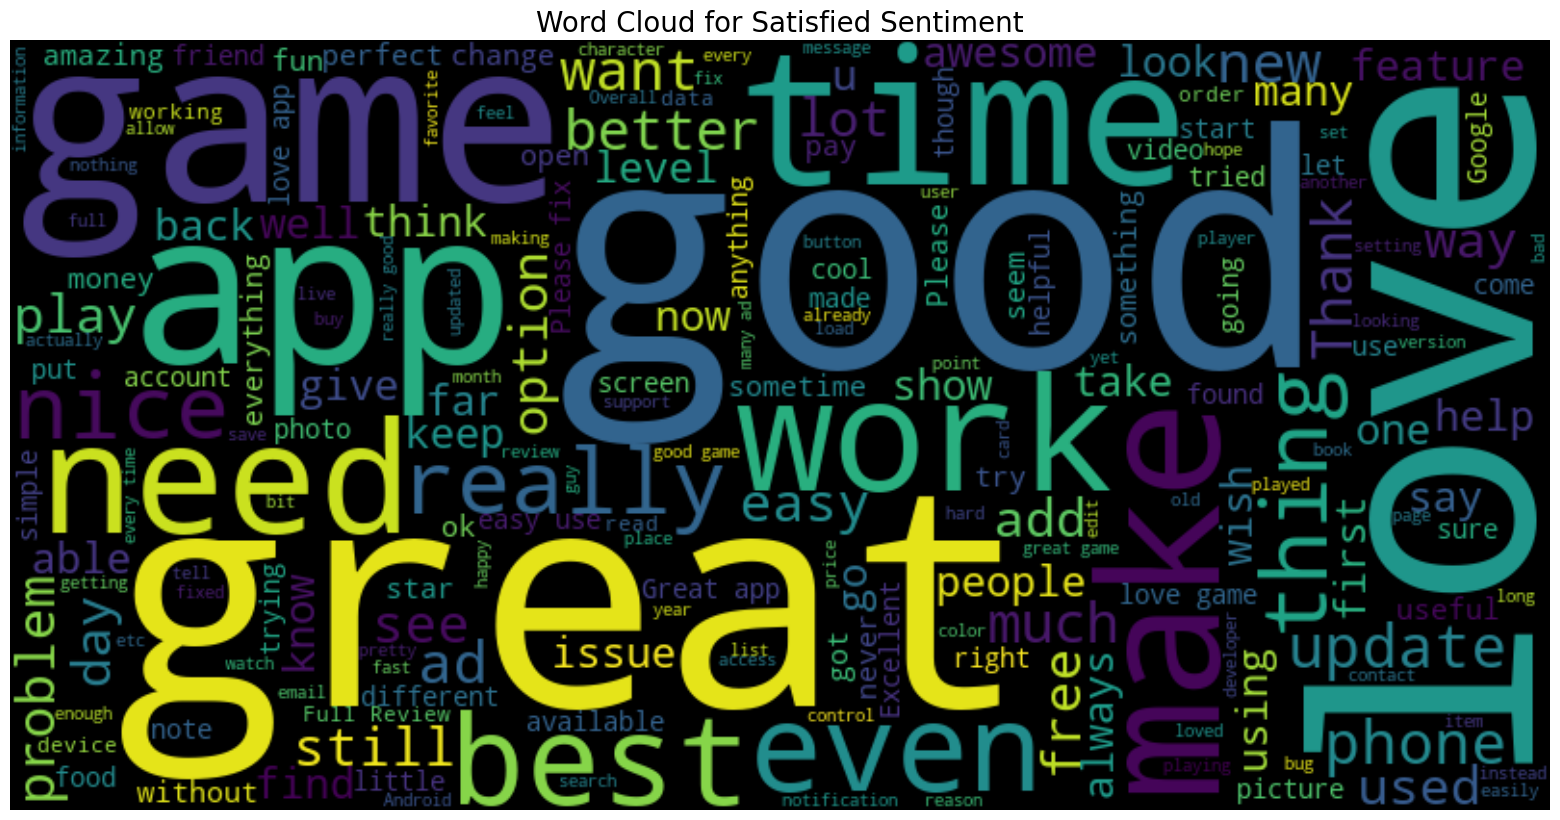

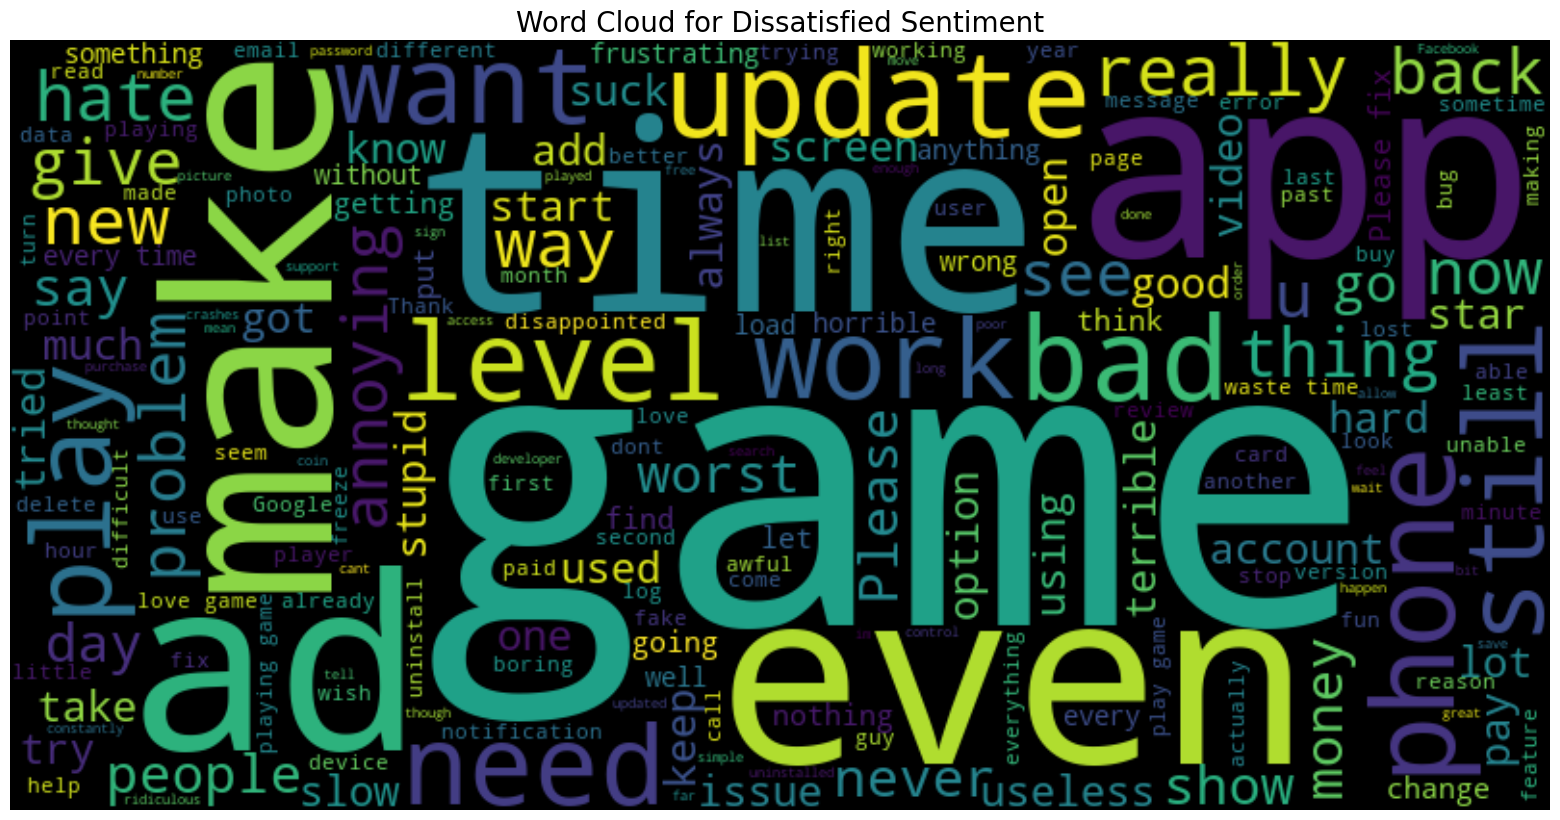

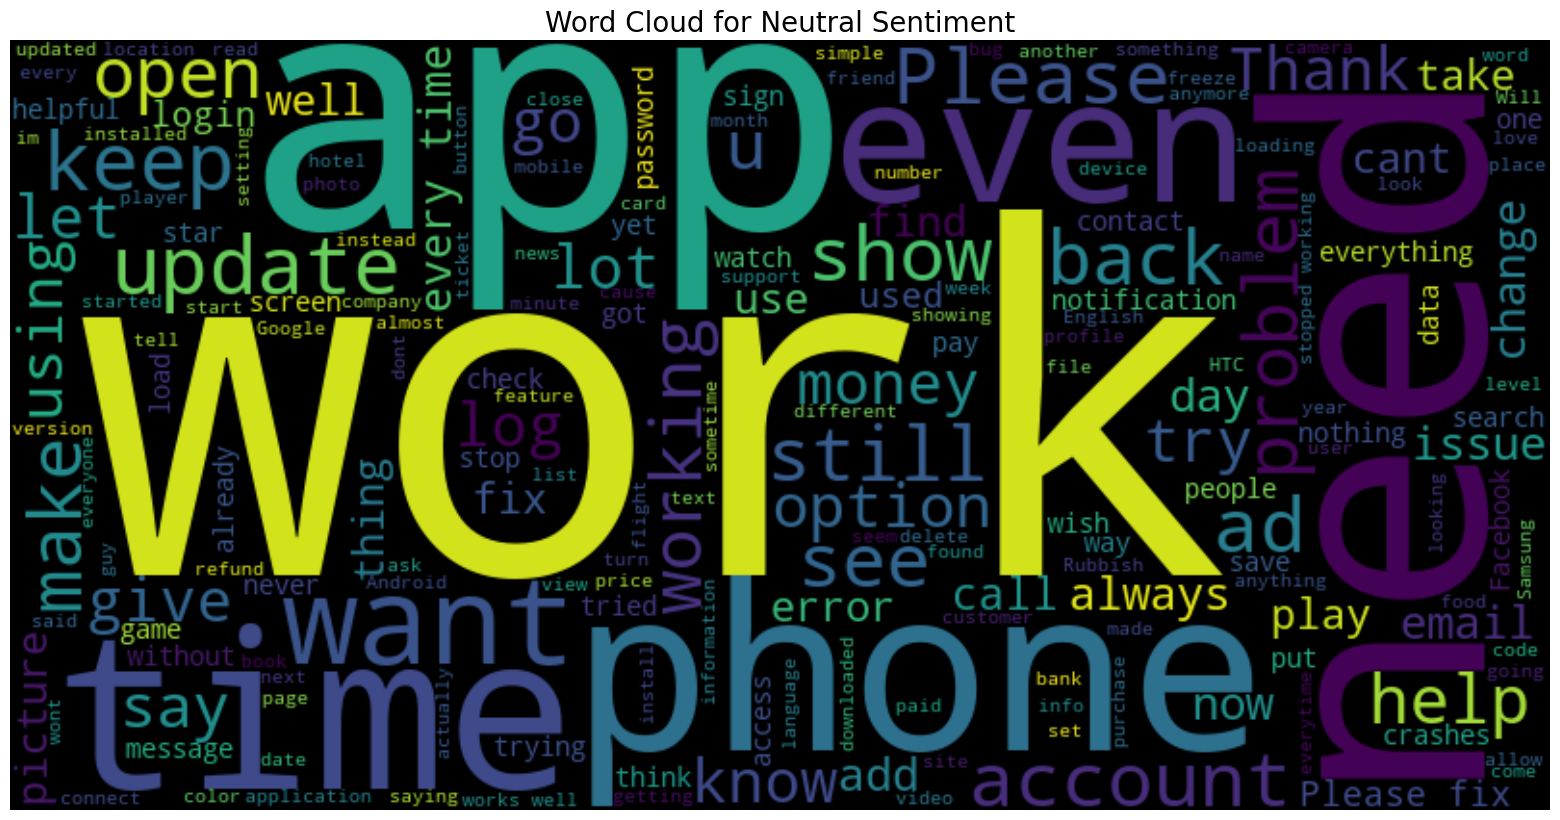

In [56]:
def plot_wordcloud(text, title):
    # Join the list of reviews into a single string and generate the word cloud
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(text))
    
    # Plot the word cloud
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') 
    plt.title(title, fontsize=20)
    plt.show()


positive_reviews = df_train[df_train['Sentiment'] == 'Satisfied']['Review']
negative_reviews = df_train[df_train['Sentiment'] == 'Dissatisfied']['Review']
neutral_reviews = df_train[df_train['Sentiment'] == 'Neutral']['Review']


plot_wordcloud(positive_reviews, 'Word Cloud for Satisfied Sentiment')
plot_wordcloud(negative_reviews, 'Word Cloud for Dissatisfied Sentiment')
plot_wordcloud(neutral_reviews, 'Word Cloud for Neutral Sentiment')

- The most frequently words that appears in the positive reviews are great, love,good, game, nice, work, time, make, app, and best. I can see that they are actually refer to good reviews.
- he most frequently words that appears in the neutral reviews are work, app, want, need, phone, time, update, please fix. I can noticed that some of them are not refer to neutral reviews, such as please fix. Maybe, some labels of the data is incorrect. 
- The most frequently words that appears in the negative reviews are work, app, want, need, phone,time, update, please fix, terrible, and problem. I can see that they are refer to bad reviews.

## Stop Word Analysis

**Stop words**

Stop words are very common words that generally do not contribute to the meaning or emotional tone of a sentence (e.g., "the," "is," "and"). Their high frequency can skew analyses and inflate the dimensionality of a feature space. A quantitative analysis of the most frequent stop words was performed, which confirmed their high prevalence. This finding provided strong evidence that a stop word removal step was necessary during the data preprocessing phase.



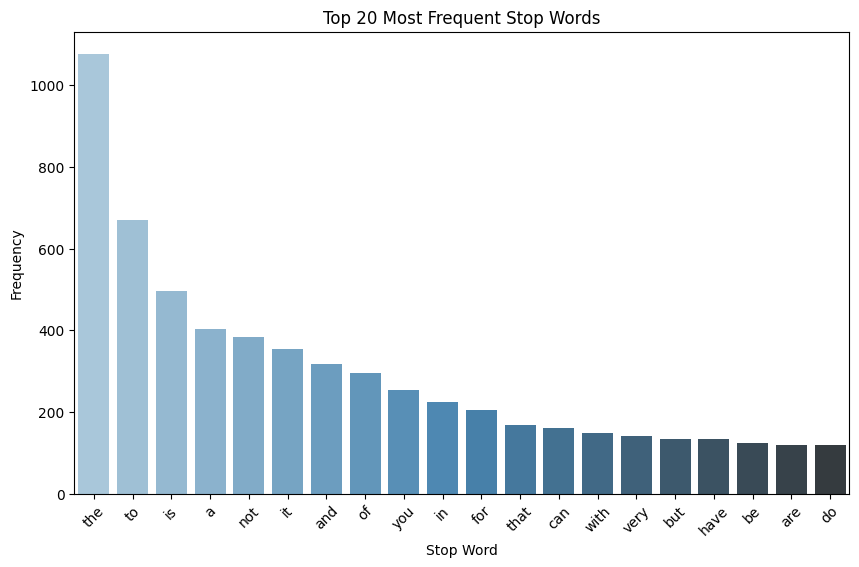

In [57]:
def extract_stopwords_and_count(text):
    stop_words = set(stopwords.words('english')) 
    words = text.split()
    stopwords_in_text = [word for word in words if word in stop_words]
    word_counts = {}
    for word in stopwords_in_text:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

df_train['stopword_counts'] = df_train['Review'].apply(extract_stopwords_and_count)
all_stopword_counts = []
for counts in df_train['stopword_counts']:
    all_stopword_counts.extend(list(counts.items()))
stopword_df = pd.DataFrame(all_stopword_counts, columns=['word', 'count'])

top_20_stopwords = stopword_df.groupby('word')['count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_stopwords.index, y=top_20_stopwords.values, palette='Blues_d')
plt.xlabel('Stop Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Stop Words')
plt.xticks(rotation=45)
plt.show()

In [58]:
total_stopwords = stopword_df['count'].sum()
print(f"Total number of stop words across all reviews: {total_stopwords}")

Total number of stop words across all reviews: 8698


An analysis of stop word frequency revealed that these common terms appeared in the dataset with high frequency. This finding supported the decision to include a stop word removal step in the data preprocessing pipeline to reduce dimensionality and improve model efficiency without lossing performance.

## Sentiment Distribution

In classification problems, it is crucial to examine the distribution of the target variable to check for class imbalance. An imbalanced dataset, where one class significantly outnumbers the others, can lead to a biased model that performs well on the majority class but poorly on the minority classes.

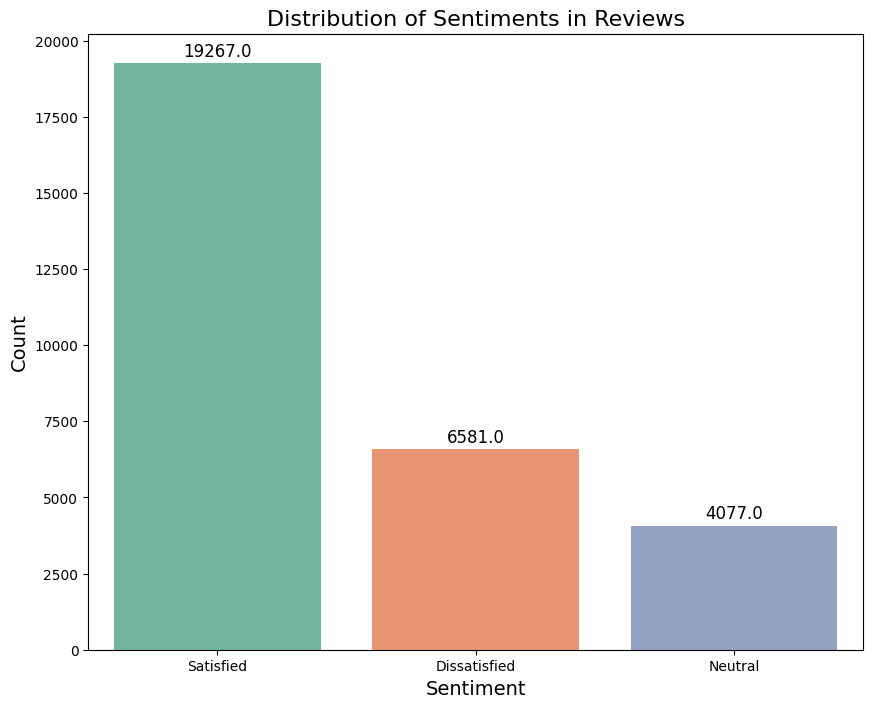

In [59]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df_train, x='Sentiment', palette='Set2', order=df_train['Sentiment'].value_counts().index)

plt.title('Distribution of Sentiments in Reviews', fontsize=16)

plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

A histogram of the Sentiment column was plotted to visualize the class distribution. The analysis showed a clear imbalance, with the Satisfied class representing the majority of the reviews, while the Neutral and Dissatisfied classes were significantly smaller. This finding confirmed the need for a re-sampling strategy, such as oversampling the minority classes, to create a balanced dataset for model training.

## Language Distribution

**Language Distribution**

Language detection from fasttext library is a preliminary step in multilingual text processing. If a dataset is expected to contain reviews in multiple languages but the analysis is restricted to a single language, reviews in other languages must be filtered out to ensure the model's accuracy. 

To ensure the integrity of the analysis, a language detection step was performed on each review. The langdetect library was used to identify the language and a confidence score. A visualization of the language distribution confirmed that while the majority of reviews were English, the dataset also contained a small number of reviews in other languages. This necessitated a filtering step in preprocessing to ensure the model was only trained on English-language data, aligning with the project's scope.

In [60]:
from ftlangdetect import detect

In [61]:
def detect_languages(series):
  languages = []
  for text in series:
    languages.append(detect(text, low_memory=False))
  return languages

df_train['Language'] = df_train['Review'].apply(detect_languages)
df_test['Language'] = df_test['Review'].apply(detect_languages)

# Apply Language detect in train dataset
df_train['Languages'] = df_train['Language'].apply(lambda x: x[0]['lang'])
df_train['Percentage'] = df_train['Language'].apply(lambda x: x[0]['score'])
df_train = df_train.drop('Language', axis=1)

# Apply Language detect in test dataset
df_test['Languages'] = df_test['Language'].apply(lambda x: x[0]['lang'])
df_test['Percentage'] = df_test['Language'].apply(lambda x: x[0]['score'])
df_test = df_test.drop('Language', axis=1)

df_train[['Review','Languages','Percentage']]

Review Languages  Percentage
60632  The facts correct I'm seeing anything except f...        en    0.787229
40286  I would like to know where I can redeem my ent...        en    0.997913
46991  Poser- I mislead thinking Google Flights app. ...        en    0.943670
35090                                      It BlackBerry        en    0.997913
63804  Found bed bugs hotel, immediately checked out....        en    0.205385
...                                                  ...       ...         ...
54886                                          like easy        fr    0.171356
11284                                               Love        en    0.880637
44732           Good It good boring didn't fall outfits.        en    0.944009
54343  I love app, thank developers amazing app, ther...        en    0.997913
56422  Right, I went swimming I got back data warning...        en    0.919055

[29925 rows x 3 columns]

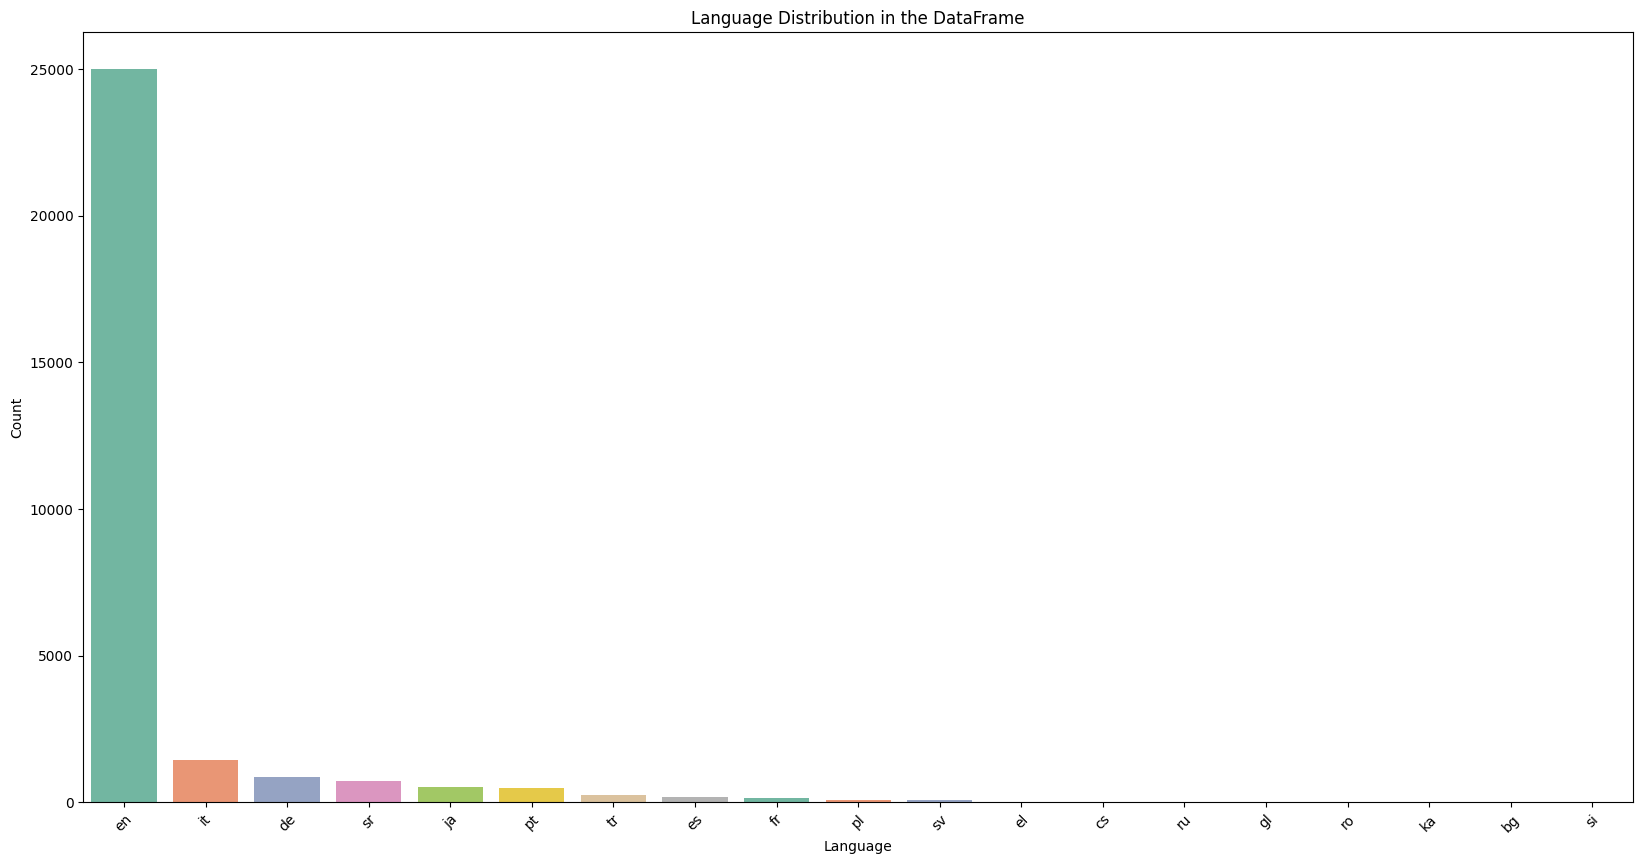

In [62]:
language_counts = df_train['Languages'].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='Set2')
plt.title('Language Distribution in the DataFrame')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The histogram revealed that while the majority of reviews were in English, a small proportion were in other languages. Given that the business task is focused exclusively on English-language reviews, a filtering step was deemed necessary to remove non-English content and reviews with a language confidence score below 90%.

## The most feedback application

Visualizing 10 applications that have large amount of reviews on Google playstore by using histogram.

Reviews per App:
App
Bowmasters                        257
Helix Jump                        225
Angry Birds Classic               219
Calorie Counter - MyFitnessPal    206
Duolingo: Learn Languages Free    198
Candy Crush Saga                  196
8 Ball Pool                       185
Garena Free Fire                  174
Calorie Counter - Macros          165
10 Best Foods for You             160
Name: count, dtype: int64


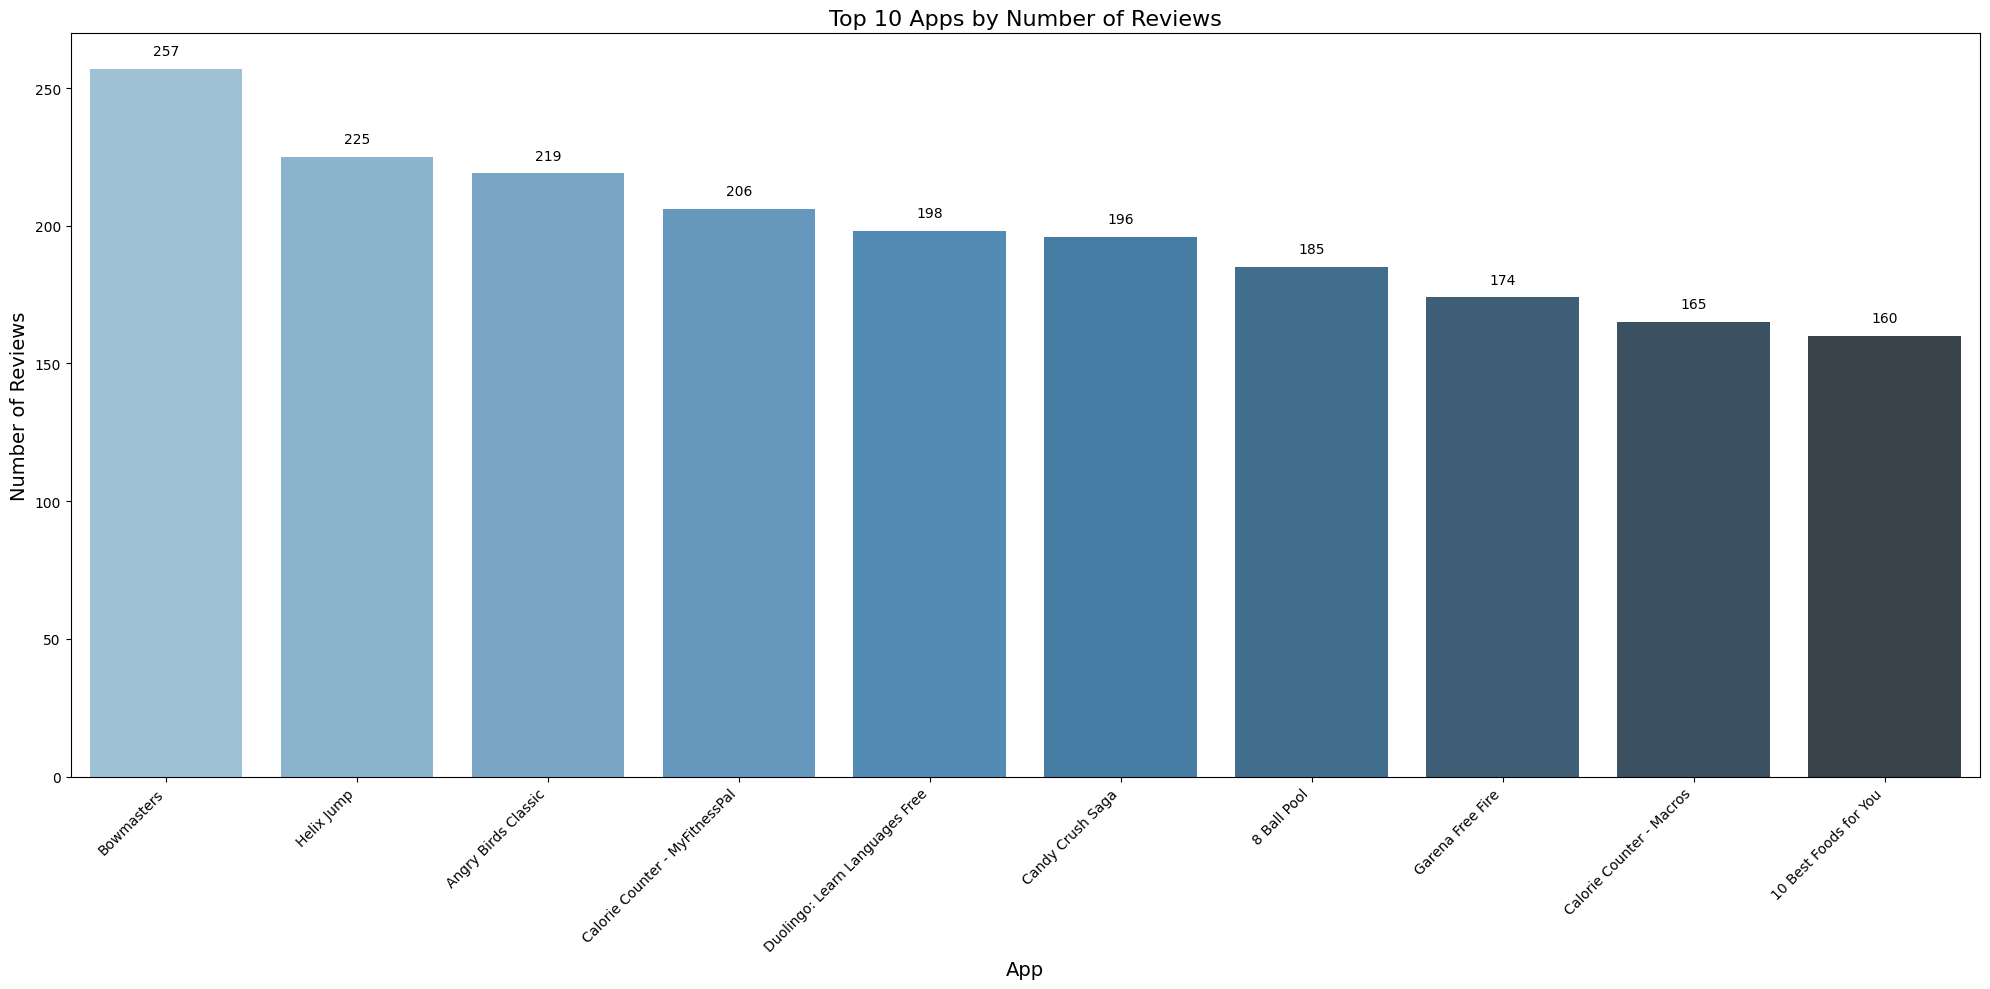

In [63]:
reviews_per_app = df_train['App'].value_counts()
print("Reviews per App:")
print(reviews_per_app.head(10))  

plt.figure(figsize=(20, 10)) 

sns.barplot(x=reviews_per_app.head(10).index, y=reviews_per_app.head(10).values, palette='Blues_d')

plt.xticks(rotation=90)

for i, value in enumerate(reviews_per_app.head(10).values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.title('Top 10 Apps by Number of Reviews', fontsize=16)
plt.xlabel('App', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the histogram, it shows
that most reviews are belong to application Bow master application.

## Visualize polarity and subjectivity of reviews

Sentiment polarity quantifies the positivity or negativity of a text (typically on a scale from -1 to 1), while sentiment subjectivity measures the degree to which a text is factual versus opinion-based (on a scale from 0 to 1). Together, they provide insight into the emotional and informational content of reviews. A bar chart and a scatter plot were used to visualize the mean sentiment polarity and subjectivity for each class. To gain a deeper understanding of the nature of the reviews, the attributes of sentiment polarity and sentiment subjectivity were analyzed.

- Sentiment Polarity quantifies the emotional charge of a text, ranging from negative (−1.0) to positive (+1.0).
- Sentiment Subjectivity measures how much a text expresses personal opinion versus objective fact, ranging from factual (0.0) to opinion-based (1.0).



Mean Polarity and Subjectivity by Sentiment:
              Sentiment Polarity  Sentiment Subjectivity
Sentiment                                               
Dissatisfied           -0.254992                0.534298
Neutral                 0.000000                0.080311
Satisfied               0.371547                0.565348


<Figure size 2000x1000 with 0 Axes>

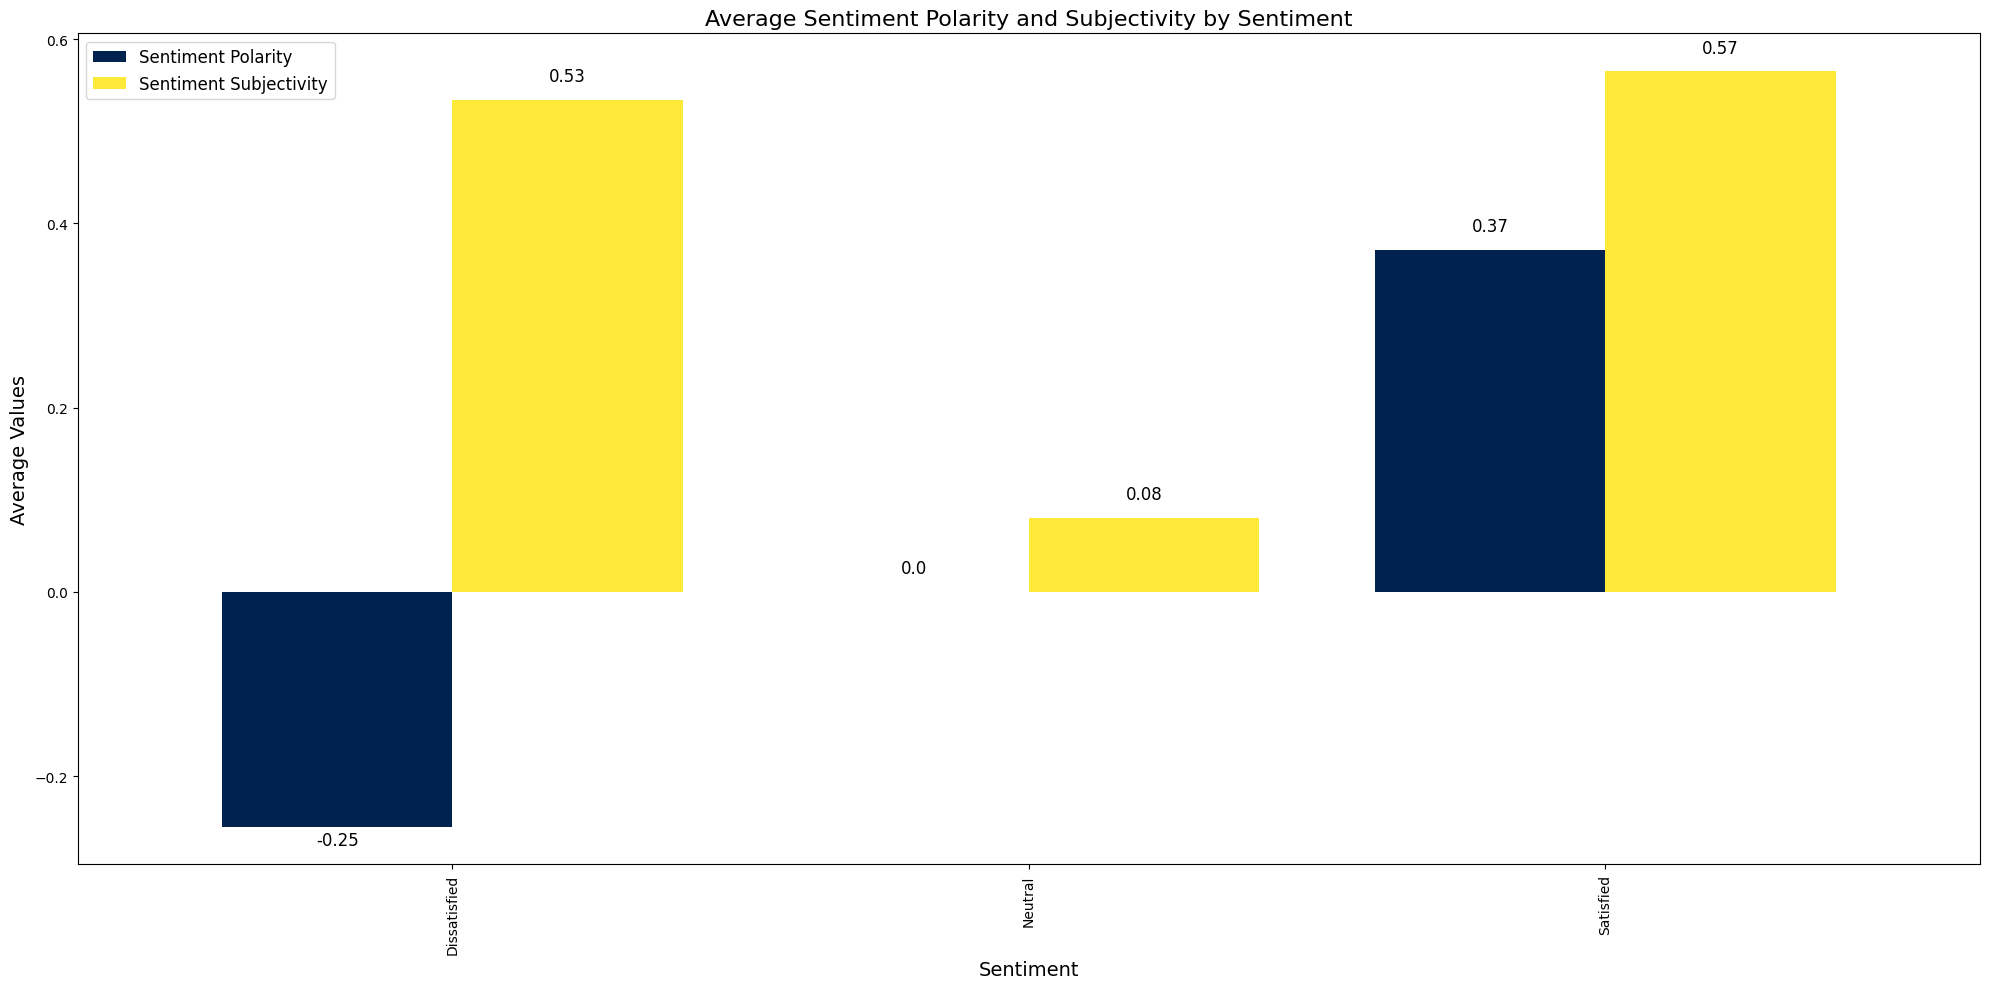

In [64]:
mean_polarity_subjectivity = df_train.groupby('Sentiment')[['Sentiment Polarity', 'Sentiment Subjectivity']].mean()

print("Mean Polarity and Subjectivity by Sentiment:")
print(mean_polarity_subjectivity)

plt.figure(figsize=(20, 10))

mean_polarity_subjectivity.plot(kind='bar', figsize=(20, 10), colormap='cividis', width=0.8)

plt.title('Average Sentiment Polarity and Subjectivity by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Average Values', fontsize=14)

# Add data labels on top of the bars
for i in range(len(mean_polarity_subjectivity)):
    for j in range(len(mean_polarity_subjectivity.columns)):
        plt.text(i - 0.2 + j * 0.4, 
                 mean_polarity_subjectivity.iloc[i, j] + 0.02 * (-1 if mean_polarity_subjectivity.iloc[i, j] < 0 else 1), 
                 round(mean_polarity_subjectivity.iloc[i, j], 2), 
                 ha='center', fontsize=12)

plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Analysis of Sentiment Polarity**

The sentiment polarity across the dissatisfied, neutral, and satisfied classes directly reflects the ground-truth sentiment for each review. The presence of a dissatisfied sentiment within the satisfied class (or a satisfied or dissatisfied sentiment within the neutral class) would be an indicator of data quality issues. Such inconsistencies would suggest the dataset is unreliable for training a robust and accurate model.

**Analysis of Sentiment Subjectivity**

The sentiment subjectivity within the satisfied and dissatisfied classes indicates that these reviews contain a high degree of useful information rather than just emotional expressions or personal opinions. This suggests the content is more factual or objective, making it valuable for training a model to distinguish between different sentiment categories.

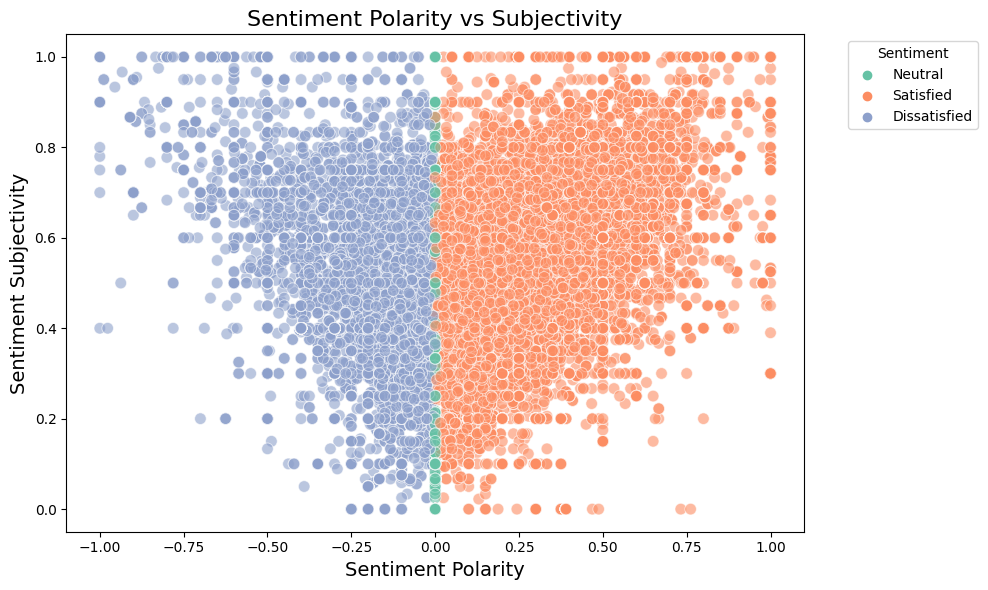

In [65]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Sentiment Polarity', 
                y='Sentiment Subjectivity', 
                data=df_train, 
                hue='Sentiment', 
                palette='Set2', 
                alpha=0.6,  
                s=70)     

plt.title('Sentiment Polarity vs Subjectivity', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Sentiment Subjectivity', fontsize=14)

plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.grid(False)
plt.show()

- The most reviews are quite quite close to be a neutral reviews, and it seem to be less extremely in dissatisfied reviews and satisfied reviews. Satisfied reviews have large amount of data that contained useful information more than disatisfied reviews. It can be noticed that on sentiment polarity range is -0.5 to 0.5, there are contained a large number of data distributed around there.Therefore, it means that most customers tend to have quite neutral feedback with slightly positive and negative on applications in Google playstore.
- There are less opinion or emotion reviews on dissatisfied and satisfied reviews, and most of the reviews quite give information on each application, which can be noticed from sentiment subjectivity over 0.5 has large amount of datapoint more than range 0 to 0.5.
- In summary from correlation and bar chart between sentimental subjuctivity and sentiment polarity, it can interpret that most reviews in satisfied, neutral, and dissatisfied clsses give the beneficial information (factual information) more than give opinion or emotion in reviews for application developers to improve their application from customer's reviews.

A scatter plot and a bar chart of these two features revealed key insights:

- The mean polarity values for each sentiment class were consistent with their labels: negative for Dissatisfied, near zero for Neutral, and positive for Satisfied.
- The subjectivity scores for the Satisfied and Dissatisfied classes were significantly higher than for the Neutral class. This suggests that positive and negative reviews contain more subjective opinions than factual information.
- The scatter plot showed that most reviews clustered around a polarity of zero, indicating that customer feedback tends to be slightly neutral, with a less extreme distribution towards strongly positive or negative opinions.

# Data Preprocessing

Data preprocessing is a fundamental stage in any Natural Language Processing (NLP) pipeline. Its primary goal is to transform raw, unstructured text into a clean and standardized format that is suitable for machine learning algorithms. The process detailed below was informed by the insights gained during the exploratory data analysis (EDA) phase.

The data preprocessing for this task involves several sequential steps:

- Text Cleaning (Regular Expressions)
- Tokenization
- Stop Word Removal
- Lemmatization

## DataFrame Preparation

The initial step involved preparing the datasets for cleaning. The original review text was preserved in a new column, Original Review, to allow for a direct comparison with the preprocessed output. 

In [66]:
df_train['Original Review'] = df_train['Review']
df_train = df_train.drop('stopword_counts', axis=1)
df_test['Original Review'] = df_test['Review']
df_train

App  \
60632                         Health and Nutrition Guide   
40286                                              Entel   
46991                                            Flights   
35090                      Docs To Go™ Free Office Suite   
63804   HotelTonight: Book amazing deals at great hotels   
...                                                  ...   
54886                                         Google Ads   
11284  Baby ABC in box! Kids alphabet games for toddl...   
44732                                   Fashion in Vogue   
54343                                    Golden Launcher   
56422                                      Google Photos   

                                                  Review  Sentiment  \
60632  The facts correct I'm seeing anything except f...    Neutral   
40286  I would like to know where I can redeem my ent...    Neutral   
46991  Poser- I mislead thinking Google Flights app. ...    Neutral   
35090                                      It BlackBerry    Neutral   
63804  Found bed bugs hotel, immediately checked out....    Neutral   
...                                                  ...        ...   
54886                                          like easy  Satisfied   
11284                                               Love  Satisfied   
44732           Good It good boring didn't fall outfits.  Satisfied   
54343  I love app, thank developers amazing app, ther...  Satisfied   
56422  Right, I went swimming I got back data warning...  Satisfied   

       Sentiment Polarity  Sentiment Subjectivity Languages  Percentage  \
60632            0.000000                0.000000        en    0.787229   
40286            0.000000                0.000000        en    0.997913   
46991            0.000000                0.000000        en    0.943670   
35090            0.000000                0.000000        en    0.997913   
63804            0.000000                0.000000        en    0.205385   
...                   ...                     ...       ...         ...   
54886            0.433333                0.833333        fr    0.171356   
11284            0.500000                0.600000        en    0.880637   
44732            0.133333                0.733333        en    0.944009   
54343            0.550000                0.750000        en    0.997913   
56422            0.095238                0.178571        en    0.919055   

                                         Original Review  
60632  The facts correct I'm seeing anything except f...  
40286  I would like to know where I can redeem my ent...  
46991  Poser- I mislead thinking Google Flights app. ...  
35090                                      It BlackBerry  
63804  Found bed bugs hotel, immediately checked out....  
...                                                  ...  
54886                                          like easy  
11284                                               Love  
44732           Good It good boring didn't fall outfits.  
54343  I love app, thank developers amazing app, ther...  
56422  Right, I went swimming I got back data warning...  

[29925 rows x 8 columns]

## Language Filtering

An important finding from the EDA was the presence of non-English reviews. To ensure the model is trained exclusively on English content, a filtering operation was performed. Reviews with a language label other than 'en' or a confidence percentage below 90% were removed from both the training and testing DataFrames. This step aligns the dataset with the project's scope, which focuses on sentiment analysis of English reviews.

In [67]:
df_train = df_train[(df_train['Languages'].isin(['en'])) & (df_train['Percentage'] > 0.9)]
df_train = df_train.drop(['Languages', 'Percentage'], axis=1)

df_test = df_test[(df_test['Languages'].isin(['en'])) & (df_test['Percentage'] > 0.9)]
df_test = df_test.drop(['Languages', 'Percentage'], axis=1)

# save dataset to train transformer
df_train_transformer = df_train[['Review', 'Sentiment']]
df_train 

App  \
40286                            Entel   
46991                          Flights   
35090    Docs To Go™ Free Office Suite   
2279                         A+ Mobile   
60789                       Helix Jump   
...                                ...   
37194  DroidAdmin for Android - Advice   
6265                  Alto's Adventure   
44732                 Fashion in Vogue   
54343                  Golden Launcher   
56422                    Google Photos   

                                                  Review     Sentiment  \
40286  I would like to know where I can redeem my ent...       Neutral   
46991  Poser- I mislead thinking Google Flights app. ...       Neutral   
35090                                      It BlackBerry       Neutral   
2279   I rated higher, lowering rating. It simply wor...  Dissatisfied   
60789  Way many ads liking. This really good fun game...     Satisfied   
...                                                  ...           ...   
37194  I know many people giving bad reviews. Saying ...  Dissatisfied   
6265   Game awesome, I'm quite disappointed Alto's Od...  Dissatisfied   
44732           Good It good boring didn't fall outfits.     Satisfied   
54343  I love app, thank developers amazing app, ther...     Satisfied   
56422  Right, I went swimming I got back data warning...     Satisfied   

       Sentiment Polarity  Sentiment Subjectivity  \
40286            0.000000                0.000000   
46991            0.000000                0.000000   
35090            0.000000                0.000000   
2279            -0.063889                0.348413   
60789            0.013889                0.516667   
...                   ...                     ...   
37194           -0.050000                0.543333   
6265            -0.070000                0.550000   
44732            0.133333                0.733333   
54343            0.550000                0.750000   
56422            0.095238                0.178571   

                                         Original Review  
40286  I would like to know where I can redeem my ent...  
46991  Poser- I mislead thinking Google Flights app. ...  
35090                                      It BlackBerry  
2279   I rated higher, lowering rating. It simply wor...  
60789  Way many ads liking. This really good fun game...  
...                                                  ...  
37194  I know many people giving bad reviews. Saying ...  
6265   Game awesome, I'm quite disappointed Alto's Od...  
44732           Good It good boring didn't fall outfits.  
54343  I love app, thank developers amazing app, ther...  
56422  Right, I went swimming I got back data warning...  

[14140 rows x 6 columns]

## Text Cleaning and Normalization

Text normalization is the process of converting text into a standard format to reduce variations that do not affect meaning. The following sequence of operations was applied to each review:

- **Punctuation and Special Character Removal:** Regular expressions were used to eliminate emojis, special characters, and punctuation. The goal is to remove non-alphanumeric noise that would otherwise create a large and uninformative feature space when vectorizing the text.
  
- **Text Normalization:** All text was converted to lowercase. This standardizes words like "Good," "good," and "GOOD," ensuring they are treated as a single token, which reduces the overall vocabulary size and improves model efficiency.

- **Tokenization:** Tokenization is the process of segmenting a sequence of characters into meaningful units, or tokens. In this case, each sentence was broken down into a list of individual words. This is a foundational step for all subsequent text processing tasks.

- **Stop Word Removal:** Stop words are common words in a language (e.g., "a", "the", "is") that carry little semantic weight. They were removed from the tokenized lists to reduce noise and lower the dimensionality of the feature vectors without sacrificing critical information.

- **Lemmatization:** Lemmatization is a linguistic process that reduces words to their base or dictionary form. Unlike stemming, which often results in truncated, non-dictionary forms (e.g., "running" becomes "runn"), lemmatization uses a vocabulary and morphological analysis to convert words to a valid form (e.g., "running" becomes "run" and "better" becomes "good"). This approach was selected to ensure the base words retained linguistic meaning, which can improve model accuracy.

In [68]:
def remove_special_chars(text):
    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags
        "]",
        flags=re.UNICODE
    )
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation and special characters
    text = text.lower().strip()                                       # Convert to lowercase and strip extra spaces
    return text

# Function to tokenize the text into individual words
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Function to remove stopwords from the tokenized text
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

def lemmatize_tokens(tokenized_list):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokenized_list]

In [69]:
# Apply functions to DataFrame columns
df_train['Remove Special Chars'] = df_train['Review'].apply(remove_special_chars)
df_train['Tokenize Text'] = df_train['Remove Special Chars'].apply(tokenize_text)
df_train['Remove Stopwords'] = df_train['Tokenize Text'].apply(remove_stopwords)
df_train['Lemmatize Tokens'] = df_train['Remove Stopwords'].apply(lemmatize_tokens)
df_train['Review'] = df_train['Lemmatize Tokens']

df_train[['Original Review','Remove Special Chars','Tokenize Text', 'Remove Stopwords','Lemmatize Tokens','Review']]

Original Review  \
40286  I would like to know where I can redeem my ent...   
46991  Poser- I mislead thinking Google Flights app. ...   
35090                                      It BlackBerry   
2279   I rated higher, lowering rating. It simply wor...   
60789  Way many ads liking. This really good fun game...   
...                                                  ...   
37194  I know many people giving bad reviews. Saying ...   
6265   Game awesome, I'm quite disappointed Alto's Od...   
44732           Good It good boring didn't fall outfits.   
54343  I love app, thank developers amazing app, ther...   
56422  Right, I went swimming I got back data warning...   

                                    Remove Special Chars  \
40286  i would like to know where i can redeem my ent...   
46991  poser i mislead thinking google flights app it...   
35090                                      it blackberry   
2279   i rated higher lowering rating it simply work ...   
60789  way many ads liking this really good fun game ...   
...                                                  ...   
37194  i know many people giving bad reviews saying f...   
6265   game awesome im quite disappointed altos odyss...   
44732             good it good boring didnt fall outfits   
54343  i love app thank developers amazing app theref...   
56422  right i went swimming i got back data warning ...   

                                           Tokenize Text  \
40286  [i, would, like, to, know, where, i, can, rede...   
46991  [poser, i, mislead, thinking, google, flights,...   
35090                                   [it, blackberry]   
2279   [i, rated, higher, lowering, rating, it, simpl...   
60789  [way, many, ads, liking, this, really, good, f...   
...                                                  ...   
37194  [i, know, many, people, giving, bad, reviews, ...   
6265   [game, awesome, im, quite, disappointed, altos...   
44732     [good, it, good, boring, didnt, fall, outfits]   
54343  [i, love, app, thank, developers, amazing, app...   
56422  [right, i, went, swimming, i, got, back, data,...   

                                        Remove Stopwords  \
40286  [would, like, know, redeem, entel, points, wit...   
46991  [poser, mislead, thinking, google, flights, ap...   
35090                                       [blackberry]   
2279   [rated, higher, lowering, rating, simply, work...   
60789  [way, many, ads, liking, really, good, fun, ga...   
...                                                  ...   
37194  [know, many, people, giving, bad, reviews, say...   
6265   [game, awesome, im, quite, disappointed, altos...   
44732         [good, good, boring, didnt, fall, outfits]   
54343  [love, app, thank, developers, amazing, app, t...   
56422  [right, went, swimming, got, back, data, warni...   

                                        Lemmatize Tokens  \
40286  [would, like, know, redeem, entel, point, with...   
46991  [poser, mislead, thinking, google, flight, app...   
35090                                       [blackberry]   
2279   [rated, higher, lowering, rating, simply, work...   
60789  [way, many, ad, liking, really, good, fun, gam...   
...                                                  ...   
37194  [know, many, people, giving, bad, review, sayi...   
6265   [game, awesome, im, quite, disappointed, alto,...   
44732          [good, good, boring, didnt, fall, outfit]   
54343  [love, app, thank, developer, amazing, app, th...   
56422  [right, went, swimming, got, back, data, warni...   

                                                  Review  
40286  [would, like, know, redeem, entel, point, with...  
46991  [poser, mislead, thinking, google, flight, app...  
35090                                       [blackberry]  
2279   [rated, higher, lowering, rating, simply, work...  
60789  [way, many, ad, liking, really, good, fun, gam...  
...                                                  ...  
37194  [know, many, peo

Applying the same function for cleaning text(reviews) on test dataset.

In [70]:
# Apply functions to DataFrame columns
df_test['Remove Special Chars'] = df_test['Review'].apply(remove_special_chars)
df_test['Tokenize Text'] = df_test['Remove Special Chars'].apply(tokenize_text)
df_test['Remove Stopwords'] = df_test['Tokenize Text'].apply(remove_stopwords)
df_test['Lemmatize Tokens'] = df_test['Remove Stopwords'].apply(lemmatize_tokens)
df_test['Review'] = df_test['Lemmatize Tokens']

# Feature Engineering

Feature engineering is the process of creating numerical features from raw data to prepare it for machine learning. The following techniques were applied to convert the cleaned text data and target labels into a format that a model can interpret and learn from.

Selecting review column that already preprocess as feature and sentiment as target column to train machine learning model, which will be remove unnecessary column from previous step at the same time.

In [71]:
df_train = df_train[['Review','Sentiment']]
df_test = df_test[['Review','Sentiment']]
df_train

Review     Sentiment
40286  [would, like, know, redeem, entel, point, with...       Neutral
46991  [poser, mislead, thinking, google, flight, app...       Neutral
35090                                       [blackberry]       Neutral
2279   [rated, higher, lowering, rating, simply, work...  Dissatisfied
60789  [way, many, ad, liking, really, good, fun, gam...     Satisfied
...                                                  ...           ...
37194  [know, many, people, giving, bad, review, sayi...  Dissatisfied
6265   [game, awesome, im, quite, disappointed, alto,...  Dissatisfied
44732          [good, good, boring, didnt, fall, outfit]     Satisfied
54343  [love, app, thank, developer, amazing, app, th...     Satisfied
56422  [right, went, swimming, got, back, data, warni...     Satisfied

[14140 rows x 2 columns]

Splitting the data into x_train (reviews) and y_train (sentiment) for training dataset and x_test (reviews) and y_test (sentiment) for testing dataset.

In [72]:
x_train = df_train['Review']
y_train = df_train['Sentiment']
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print('-------------------------------------------------------------------------')
x_test = df_test['Review']
y_test = df_test['Sentiment']
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (14140,)
y_train: (14140,)
-------------------------------------------------------------------------
x_test: (3563,)
y_test: (3563,)


## Encode target column

Before training the model, the categorical sentiment labels (Satisfied, Neutral, Dissatisfied) were converted into numerical representations. Label Encoding was applied to the target column, assigning a unique integer to each sentiment class. This is a necessary step, as most machine learning algorithms are designed to operate on numerical data.

Applying label encoder to encode target labels of training and testing dataset.

In [73]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([1, 1, 1, ..., 2, 2, 2])

Display label for each class after label to use them in visualization in model evaluation step.

In [74]:
# Get the class labels
class_labels = le.classes_
print(class_labels)
# Print the class labels and their corresponding encoded values
for i, label in enumerate(class_labels):
    print(f"Class: {label}, Encoded Label: {i}")

['Dissatisfied' 'Neutral' 'Satisfied']
Class: Dissatisfied, Encoded Label: 0
Class: Neutral, Encoded Label: 1
Class: Satisfied, Encoded Label: 2


## Text Representation (TF-IDF)

**Term Frequency-Inverse Document Frequency (TF-IDF)**

Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used statistical method for text representation. It reflects how important a word is to a document within a corpus. The TF-IDF value for a word increases proportionally to its frequency in a document but is offset by the frequency of the word in the entire dataset. This normalization prevents common words from dominating the feature vector. By using TF-IDF, the model is able to focus on words that are highly specific and informative for each sentiment class, rather than general, frequently occurring terms.

Checking number of words in the longest review in my training dataset to know the hyperparameter of TF-IDF that is max feature.

In [75]:
# Find the maximum length
df_train['text_length'] = df_train['Review'].apply(len) 
max_length = df_train['text_length'].max()  
df_train = df_train.drop(['text_length'], axis=1)

print(f"The maximum text length is: {max_length}")

The maximum text length is: 158


Converting tokenize words of reviews in training and testing dataset to list, then I fit and transform TF-IDF on training dataset and transform TF-IDF on testing dataset. Then, the data is converted to array after applying TF-IDF, which make the dataset ready to train the model.

In [76]:
x_train = x_train.astype(str).tolist()
x_test = x_test.astype(str).tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=max_length)

# Fit and transform the preprocessed text data
x_train = tfidf_vectorizer.fit_transform(x_train)
x_test = tfidf_vectorizer.transform(x_test)

# Convert sparse matrix to dense array
x_train = x_train.toarray()
x_test = x_test.toarray()

# Display the TF-IDF features
print(x_train)

[[0.         0.         0.         ... 0.         0.54554579 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Dimensionality reduction

After TF-IDF transformation, the dataset contained a large number of features. A high-dimensional feature space can lead to the curse of dimensionality, where a model may overfit to the training data and generalize poorly to unseen data. To mitigate this, Principal Component Analysis (PCA) was applied. PCA is an unsupervised learning algorithm that linearly transforms the data into a new, lower-dimensional space. It identifies the principal components—linear combinations of the original variables—that capture the maximum variance in the data. The number of components was reduced from 158 to 80 to balance the need for computational efficiency and the preservation of essential data variance.

In [77]:
pca = PCA(n_components=80)  # Reduce to 10 principal components
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (14140, 80)
x_test: (3563, 80)


## Oversampling

**Oversampling (SMOTE) - Solution for Class Imbalance**

The EDA revealed a significant class imbalance, with the Satisfied class being the majority. Training a model on an imbalanced dataset can lead to bias, where the model performs well on the majority class but poorly on the minority classes. To correct this, an oversampling technique was implemented using SMOTE (Synthetic Minority Over-sampling Technique). SMOTE works by generating synthetic data points for the minority classes based on the feature space of existing minority instances. This process successfully balanced the proportion of each class in the training dataset, creating an equal representation for Dissatisfied, Neutral, and Satisfied sentiments and enabling the model to learn from all classes more effectively.

In [78]:
y_train_series = pd.Series(y_train)
print("\nClass Distribution After Undersampling:")
print(y_train_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
2    66.760962
0    20.304102
1    12.934936
Name: proportion, dtype: float64


Training dataset shows that it has satisfied review 65%, dissatisfied review 23%, and 10% neutral review.

In [79]:
# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)
x_train = x_resampled
y_train = y_resampled

y_resampled_series = pd.Series(y_resampled)
print("\nClass Distribution After Undersampling:")
print(y_resampled_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
1    33.333333
0    33.333333
2    33.333333
Name: proportion, dtype: float64


After oversample, the proportion of each classes in training dataset is balanced.

# Modeling

The predictive modeling phase of this project focused on selecting and optimizing a machine learning model to accurately classify text reviews into sentiment categories. The methodology involved three key steps: initial model selection using cross-validation, a comparison of individual versus ensemble models, and a final hyperparameter tuning phase using Bayesian optimization.

## Model Selection and Cross-Validation

To find the most suitable model, a variety of machine learning classifiers were evaluated. Cross-validation was employed to ensure a robust performance metric that is not dependent on a single train-test split. This technique involves partitioning the data into multiple folds and training the model on different combinations of these folds. The final performance is an average of the scores across all folds, which provides a more reliable estimate of the model's generalization ability.

The models trained and validated were:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest Classifier
- XGBoost
- LightGBM
- CatBoost

Defined machine learning classifier models

In [59]:
ml_models = [('Logistics', LogisticRegression()),
             ("KNN" , KNeighborsClassifier()),
             ("Decision Tree" , DecisionTreeClassifier()),
             ("Random Forest Classifier" , RandomForestClassifier()),
             ("XGBoost" , XGBClassifier()),
             ("LightGBM" , LGBMClassifier(verbose=0)),
             ("CatBoost" , CatBoostClassifier(verbose=0))]

Using for-loop to train the models and valid the model.

In [60]:
for model in ml_models:
    print(model[0]+": ")
    model[1].fit(x_train, y_train)
    cv = cross_val_score(model[1], x_train, y_train, cv=5, scoring='accuracy')
    print("\tK-Fold Cross-Validation:", cv)
    print('-'*100)
    print(f'\tAverage K-Fold Cross-Validation: {cv.mean()}')
    print('-'*100)

Logistics: 
	K-Fold Cross-Validation: [0.69897599 0.71557203 0.71804379 0.71980932 0.72634181]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.7157485875706215
----------------------------------------------------------------------------------------------------
KNN: 
	K-Fold Cross-Validation: [0.72033898 0.77224576 0.77789548 0.78036723 0.77754237]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.7656779661016949
----------------------------------------------------------------------------------------------------
Decision Tree: 
	K-Fold Cross-Validation: [0.80243644 0.8220339  0.8269774  0.82415254 0.81161723]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.8174435028248588
-----------------------------------------------------

From result from cross-validation, the cross-validation results indicated that the tree-based models (Random Forest, XGBoost, and CatBoost) significantly outperformed the simpler classifiers, with the Random Forest Classifier achieving the highest average accuracy.

## Ensemble machine learning model.

Ensemble learning is a powerful technique that combines the predictions of multiple individual models (often called "weak learners") to improve overall performance. The core principle is that a collection of models can often make more accurate and robust predictions than any single model alone.

Two common ensemble methods were tested:

- Voting Classifier: This method combines the predictions of multiple models by taking a majority vote (for hard voting) or averaging the predicted probabilities (for soft voting). The models used were Random Forest, XGBoost, and CatBoost.
- Stacking Classifier: This is a more complex method where a meta-model (the final estimator) is trained on the predictions of several base models. In this case, Random Forest was chosen as the final estimator, and XGBoost and CatBoost were the base models.

Define ensemble machine learning models, weak learner models, and final estimators model(for stacking model).

In [64]:
es_models = [("Voting" , VotingClassifier(estimators=[("Random Forest Classifier" , RandomForestClassifier()),
                                                      ("XGBoost" , XGBClassifier()),
                                                      ("CatBoost" , CatBoostClassifier(verbose=0))],
                                                      n_jobs=-1,
                                                      voting='soft')),
             ("Stacking" , StackingClassifier(final_estimator=RandomForestClassifier(),
                                              estimators=[("XGBoost" , XGBClassifier()),
                                                          ("CatBoost" , CatBoostClassifier(verbose=0))],
                                              n_jobs=-1))]

Using for-loop to train the models and valid the model. 

In [66]:
for model in es_models:
    print(model[0]+": ")
    model[1].fit(x_train, y_train)
    cv = cross_val_score(model[1], x_train, y_train, cv=5, scoring='accuracy')
    print("\tK-Fold Cross-Validation:", cv)
    print('-'*100)
    print(f'\tAverage K-Fold Cross-Validation: {cv.mean()}')
    print('-'*100)

Voting: 
	K-Fold Cross-Validation: [0.86493644 0.90201271 0.91048729 0.91278249 0.90289548]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.8986228813559322
----------------------------------------------------------------------------------------------------
Stacking: 
	K-Fold Cross-Validation: [0.84781073 0.8868291  0.90589689 0.90342514 0.89583333]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation: 0.8879590395480225
----------------------------------------------------------------------------------------------------


Surprisingly, the ensemble models yielded a slightly lower accuracy than the best individual model, the Random Forest Classifier. This result demonstrated that for this specific dataset and feature set, the performance gains from ensembling were not significant, reinforcing the choice of Random Forest as the primary model.

## Hyperparameter Tuning with Bayesian Optimization

Once the best model was identified, the next step was to optimize its hyperparameters to achieve peak performance. Hyperparameters are configuration settings that are external to the model and are not learned from the data (e.g., the number of trees in a Random Forest).

Bayesian optimization was used for this task. Unlike exhaustive search methods like Grid Search, which test every possible combination, Bayesian optimization is an intelligent, probabilistic approach. It builds a model of the objective function (in this case, accuracy) and uses it to select the next set of hyperparameters to test, focusing on regions that are likely to yield better results. This makes the tuning process significantly more efficient.

Bayesian hyperparameters tuning (Optuna library) is used to find the best hyparameters for RandomForestClassifier. Hyperparameter configuration are: 
- maximum number of trials or iterations (n_trials) to 50
- use cross-validation 3
- use accuracy as metric
- set direction of optuna to maximize accuracy

### Hyperparameter tuning for RandomForestClassifier

In [90]:
def objective_rf(trial):
    # Suggest hyperparameters for the model
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"]) 
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample"])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features, 
        class_weight=class_weight,
        random_state=42,
        n_jobs=-1
    )

    # Use cross_val_score with f1_macro score
    scores = cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy')

    # Return the mean F1-macro score across all folds
    return np.mean(scores)

# Create the study and specify that we're trying to maximize the score
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Print the best trial information
print("Best Trial for RandomForestClassifier:")
print(f"Accuracy: {study_rf.best_trial.value}") 
print(f"Params: {study_rf.best_trial.params}")

[I 2024-12-17 17:15:39,125] A new study created in memory with name: no-name-59dfade2-a586-4343-a998-869cf4fcbac6
[I 2024-12-17 17:17:56,762] Trial 0 finished with value: 0.8805790960451977 and parameters: {'n_estimators': 311, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8805790960451977.
[I 2024-12-17 17:19:25,704] Trial 1 finished with value: 0.7295197740112994 and parameters: {'n_estimators': 351, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.8805790960451977.
[I 2024-12-17 17:21:54,539] Trial 2 finished with value: 0.890183615819209 and parameters: {'n_estimators': 424, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'gini', 'class_weight': 'balanced_subsample'}. Best is tr

Best Trial for RandomForestClassifier:
Accuracy: 0.8962217514124293
Params: {'n_estimators': 396, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}


The Optuna library was used to perform 50 trials of Bayesian optimization on the Random Forest Classifier. The best hyperparameters found were n_estimators=396, max_depth=19, min_samples_split=2, min_samples_leaf=1, max_features='log2', criterion='entropy', and class_weight='balanced_subsample'.

## Final Model Training

The final model was a Random Forest Classifier instantiated with the optimal hyperparameters found through Bayesian optimization. This model is now ready for final evaluation on the test set.

In [78]:
model_V = RandomForestClassifier(n_estimators=396,
                                 max_depth=19,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 random_state=42,
                                 max_features='log2',
                                 criterion='entropy',
                                 class_weight='balanced_subsample',
                                 n_jobs=-1,
                                 verbose=0)

In [79]:
model_V.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=19, max_features='log2', n_estimators=396,
                       n_jobs=-1, random_state=42)

## Additional Experiment - Pre-train model

An additional experiment was conducted using a Transformer-based model from the Hugging Face library, which represents a more advanced, deep learning approach to natural language processing. This serves as a valuable comparison to the traditional machine learning pipeline. The model was trained on a small subset of the data to demonstrate the process. A detailed comparison of the performance metrics of the traditional machine learning model and the Transformer-based model will be a key part of the final project evaluation.

In [80]:
from transformers import AutoTokenizer
from datasets import Dataset
from transformers import AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
import datasets
from transformers import DataCollatorWithPadding

In [81]:
df_train_transformer

Review     Sentiment
40286  I would like to know where I can redeem my ent...       Neutral
46991  Poser- I mislead thinking Google Flights app. ...       Neutral
35090                                      It BlackBerry       Neutral
2279   I rated higher, lowering rating. It simply wor...  Dissatisfied
60789  Way many ads liking. This really good fun game...     Satisfied
...                                                  ...           ...
37194  I know many people giving bad reviews. Saying ...  Dissatisfied
6265   Game awesome, I'm quite disappointed Alto's Od...  Dissatisfied
44732           Good It good boring didn't fall outfits.     Satisfied
54343  I love app, thank developers amazing app, ther...     Satisfied
56422  Right, I went swimming I got back data warning...     Satisfied

[14140 rows x 2 columns]

### Encode Target Label

In [82]:
le = LabelEncoder()
le.fit(df_train_transformer['Sentiment'])
df_train_transformer['Sentiment'] = le.transform(df_train_transformer['Sentiment'])
df_train_transformer = df_train_transformer.sample(n=1000)
df_train_transformer

Review  Sentiment
60197  I've gotten need wait/pay energy, lesson get a...          2
39140  I satisfied service. Can pricy tax, delivery f...          2
37023                               Join dreamtrips best          2
6928   I've since 2016 think fun! I like changes thou...          0
55995                                         Google map          1
...                                                  ...        ...
34052  When I first got back 2015 I liked I not. None...          2
43405   It pretty good. I said missed call I answered XD          2
645                                        IT ring phone          1
12298  It painfully slow load, fix medical records! N...          2
18087  My free work time never uploads new video plz ...          2

[1000 rows x 2 columns]

In [83]:
df_train_transformer = df_train_transformer.sample(n=1000)

### Tokenization

In [84]:
# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(df_train_transformer["Review"], 
                                                                    df_train_transformer["Sentiment"], 
                                                                    test_size=0.2, 
                                                                    random_state=42)

# Load the tokenizer for DistilRoBERTa
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Tokenize the text data
def tokenize_data(texts, labels):
    tokenized = tokenizer(list(texts), 
                          truncation=True, 
                          padding=True, 
                          max_length=400)
    tokenized["labels"] = labels
    return tokenized

# Prepare the training and validation datasets

train_dataset = Dataset.from_dict(tokenize_data(train_texts, train_labels))
val_dataset   = Dataset.from_dict(tokenize_data(val_texts, val_labels))
train_dataset

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 800
})

### Hyperparameter Configuration and Model Training

In [85]:
# Load the pre-trained DistilRoBERTa model

model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=5)

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=65, training_loss=0.859365727351262, metrics={'train_runtime': 2908.0525, 'train_samples_per_second': 1.375, 'train_steps_per_second': 0.022, 'total_flos': 133509442680000.0, 'train_loss': 0.859365727351262, 'epoch': 5.0})

# Model Evaluation and Performance Analysis

The final stage of the machine learning pipeline involves a rigorous evaluation of the model's performance on unseen data. This process is crucial for assessing the model's generalization ability and identifying its specific strengths and weaknesses. The evaluation was conducted using a comprehensive suite of classification metrics, including accuracy, a confusion matrix, precision, recall, the F1-score, and the Area Under the Receiver Operating Characteristic (AUC-ROC) curve.

Make predictions on test dataset

In [80]:
y_pred = model_V.predict(x_test)

## Classification Report and confusion matrix

The performance of the classification model was first assessed using a classification report, which provides a holistic view of key performance indicators for each class.

Label encoder to identify each class
- Class: Dissatisfied, Encoded Label: 0
- Class: Neutral, Encoded Label: 1
- Class: Satisfied, Encoded Label: 2

The accuracy of the model is: 0.81
Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       749
           1       0.60      0.74      0.66       483
           2       0.90      0.87      0.89      2331

    accuracy                           0.81      3563
   macro avg       0.73      0.75      0.74      3563
weighted avg       0.81      0.81      0.81      3563



------------------------------------------------------------------------------------------------------------------------------------------------------




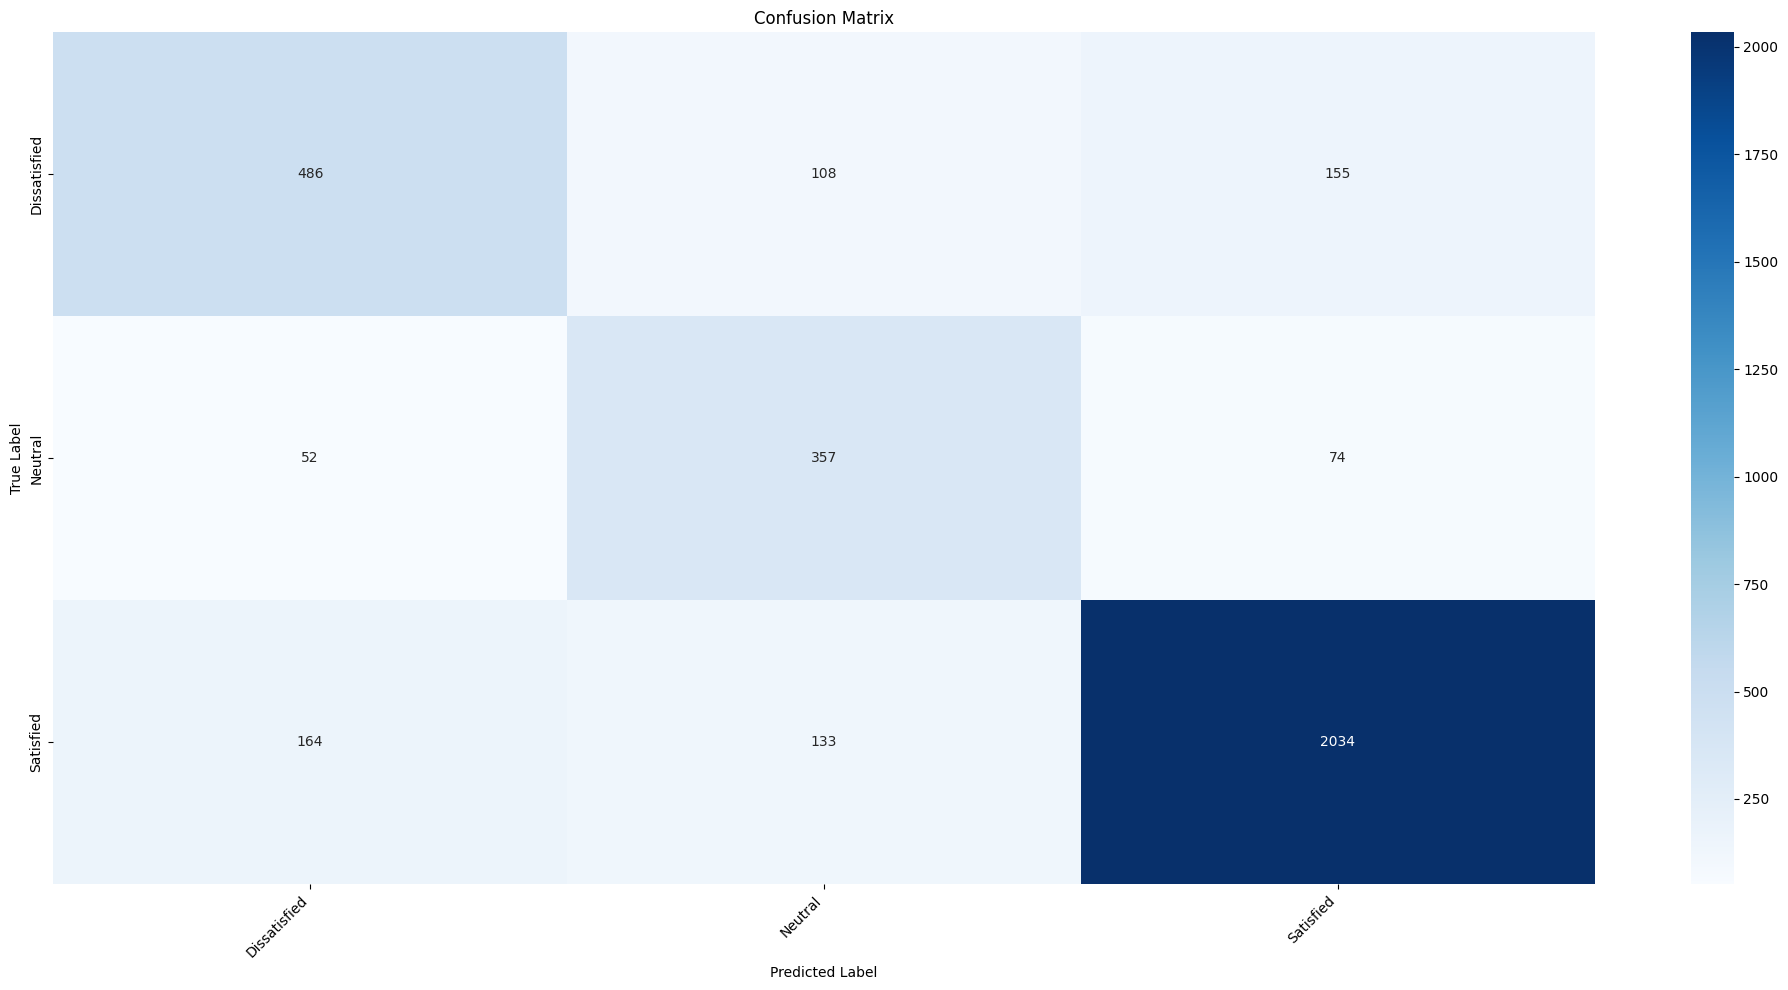

In [101]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print(f"The accuracy of the model is: {accuracy:.2f}")

# Create classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print()
print()
print('-'*150)
print()
print()

# Class labels 
class_names = ['Dissatisfied', 'Neutral', 'Satisfied']

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, ha='right')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.tight_layout()
plt.show()

**According to the classification report and confusion matrix:**

**Classification report**

Accuracy
- the accuracy of the model on test dataset is 81 percent, which is slightly different from validation dataset, it mean that the model does not have overfitting problem.

Precision:
- Dissatisfied: 69 percent of the reviews predicted as Dissatisfied were actually Dissatisfied.
- Neutral: 60% percent the reviews predicted as Neutral were actually Neutral.
- Satisfied: 90% percent the reviews predicted as Satisfied were actually Satisfied.

Recall:
- Dissatisfied: 65% of all actual Dissatisfied instances were correctly identified.
- Neutral: 74% of all actual Neutral instances were correctly identified.
- Satisfied: 87% of all actual Satisfied instances were correctly identified.

F1-Score:
- Dissatisfied: 67 percent - A balance between precision and recall for the Dissatisfied class.
- Neutral: 66 percent - A balance between precision and recall for the Neutral class.
- Satisfied: 89 percent - A good balance between precision and recall for the Satisfied class.

**Confusion matrix**

Dissatisfied Class:
- Correctly classified: 486 samples.
- Incorrect classified as Neutral: 108 samples.
- Incorrect classified as Satisfied: 155 samples.

Neutral Class:
- Correctly classified: 357 samples.
- Incorrect classified as Dissatisfied: 52 samples.
- Incorrect classified as Satisfied: 74 samples.

Satisfied Class:
- Correctly classified: 2034 samples (this is the most frequent correct prediction).
- Incorrect classified as Dissatisfied: 164 samples.
- Incorrect classified as Neutral: 133 samples.

Overall
- The model is doing well on classify satisfied reviews, which has the less wrongly in prediction results. The model tend to have weak point in predicting neutral and dissatisfied reviews, respectively, because there are the largest number worng in prediction results for both classes compared with satisfied class. However, the overall model performance is good in classification sentiment of reviews from customers.

## Probabilistic Performance Metrics

To further evaluate the model's ability to discriminate between classes, the Precision-Recall Curve and the Area Under the ROC Curve (AUC-ROC) were analyzed.

In [67]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print()
print('-'*100)
print()
print(f"Accuracy Score: {accuracy:.4f}")
print('-'*100)
print()
print(f"Precision: {precision:.4f}")
print('-'*100)
print()
print(f"Recall: {recall:.4f}")
print('-'*100)
print()
print(f"F1 Score {f1:.4f}")
print('-'*100)
print()


----------------------------------------------------------------------------------------------------

Accuracy Score: 0.8072
----------------------------------------------------------------------------------------------------

Precision: 0.8140
----------------------------------------------------------------------------------------------------

Recall: 0.8072
----------------------------------------------------------------------------------------------------

F1 Score 0.8093
----------------------------------------------------------------------------------------------------



Accuracy Score: 0.8072
- This means that the model correctly classified 80.72 percent of the reviews.

Precision: 0.8140
- This means that when the model predicted a certain, it was correct 81.40 percent of the time because it has a low rate of false positives.

Recall: 0.8072
- This indicates that the model correctly identified 80.72 percent of the actual sentiments in the dataset because it has a low rate of false negatives.

F1-Score: 0.8093
- The F1-score, which balances precision and recall, is also high 80.93 percent. This means that the model has a good overall performance in terms of both identifying true positives and minimizing false positives and negatives.

## F1 score


----------------------------------------------------------------------------------------------------
F1-Score for Class Dissatisfied: 0.67

----------------------------------------------------------------------------------------------------
F1-Score for Class Neutral: 0.66

----------------------------------------------------------------------------------------------------
F1-Score for Class Satisfied: 0.88

----------------------------------------------------------------------------------------------------


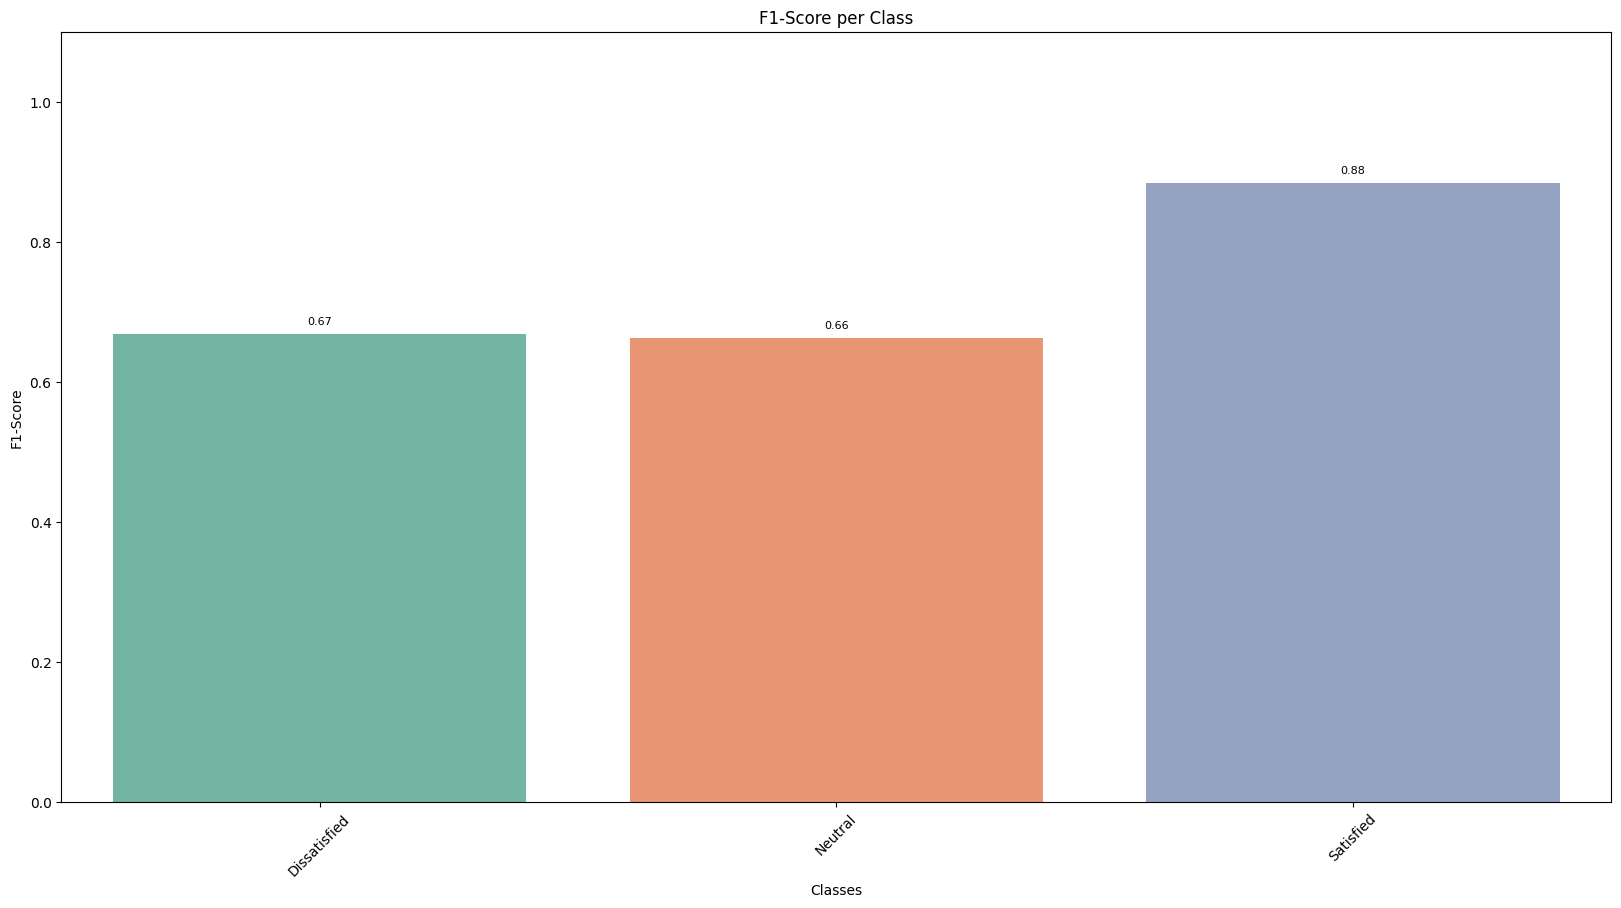

In [68]:
# Calculate F1-score for each class
f1_scores = f1_score(y_test, y_pred, average=None) 

# Print F1-scores for each class
for i, score in enumerate(f1_scores):
    print()
    print('-'*100)
    print(f"F1-Score for Class {class_names[i]}: {score:.2f}")

print()
print('-'*100)
# Create a bar chart
# Set color palette to "Set2"
sns.set_palette("Set2")

# Create a bar chart using seaborn
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=class_names, y=f1_scores)

# Add labels to each bar
for i, v in enumerate(f1_scores):
  ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=8)  # Adjust offset and font size

# Customize the plot
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score per Class')
plt.ylim(0, 1.1)  # Set y-axis limit to 1.1 for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

According from the F1 score and histogram above :
F1 score of idsatisfied class : 
- The model has ability to identified negative reviews correctly around 67 percent.

F1 score of neutral class: 
- The model has ability to identified neutral reviews correctly 66 percent.

F1 score of satisfied class: 
- The model has ability to identified positive reviews correctly 88 percent, which is doing well to identified satisfied reviews.

## Precision- Recall curve

The Precision-Recall curve plots precision against recall for different classification thresholds. A curve that is high and flat indicates that the model is maintaining a high precision even as recall increases, which is a sign of robust performance.

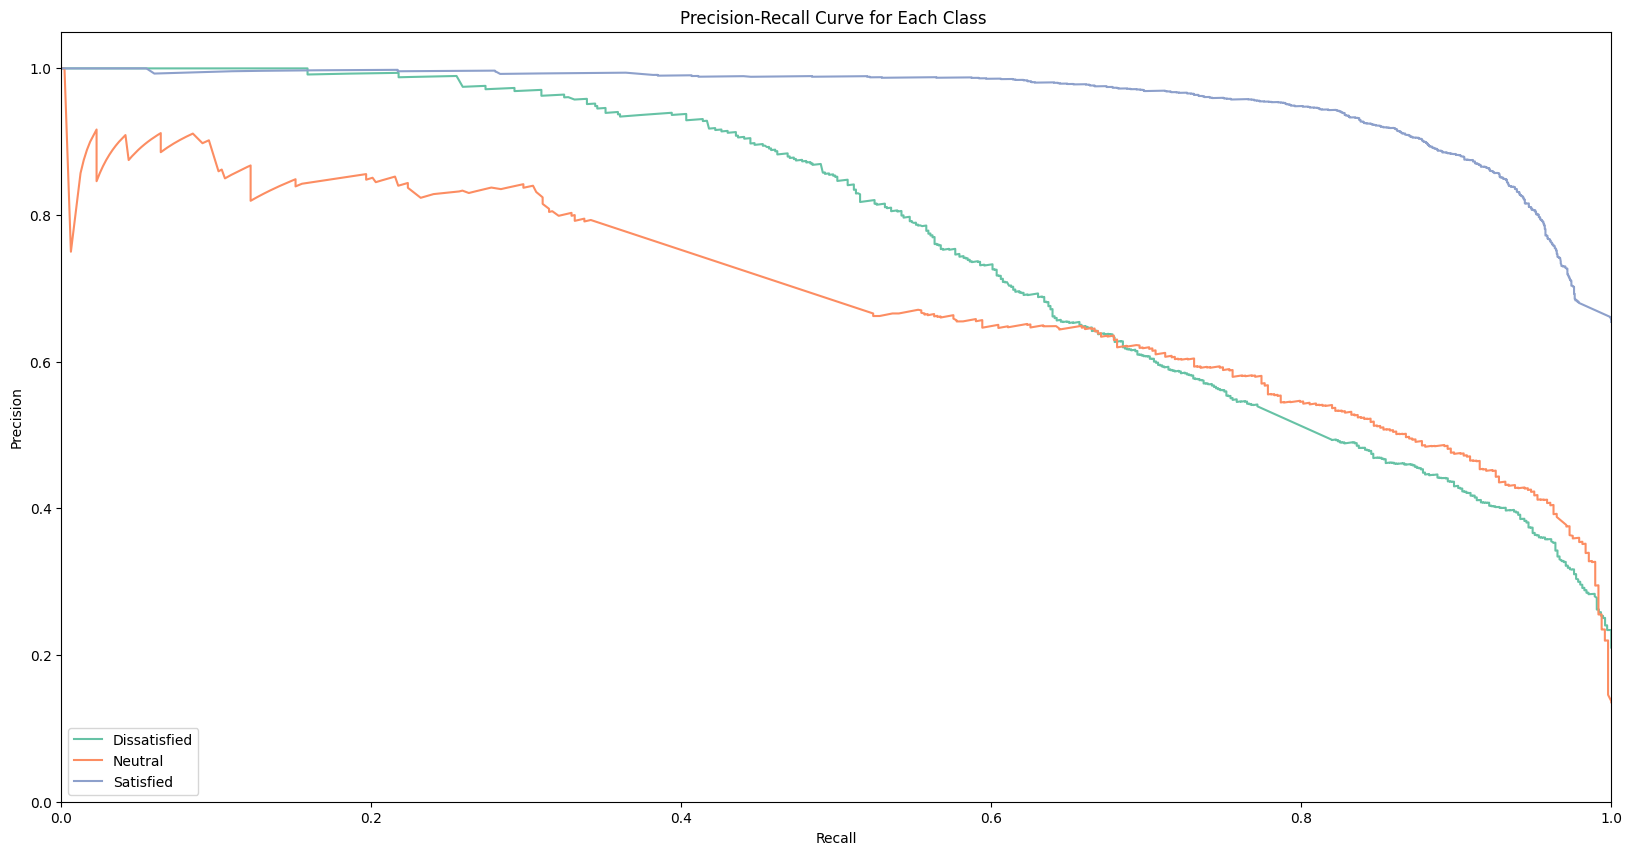

In [69]:
# Define class labels
class_labels = ['Dissatisfied', 'Neutral', 'Satisfied']

# Convert true labels to 1D 
y_test_labels = y_test.flatten()

# Initialize a plot
plt.figure(figsize=(20, 10))

# Set Seaborn color palette
sns.set_palette("Set2")

# Generate Precision-Recall curve for each class (OvR)
for i, label in enumerate(class_labels):
  # Get the true binary labels for the current class (OvR)
  y_test_bin = np.where(y_test_labels == i, 1, 0)

  # Get the predicted probabilities for the current class
  y_pred_prob = model_V.predict_proba(x_test)[:, i] 

  # Compute Precision-Recall values (OvR)
  precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)

  # Plot the curve
  plt.plot(recall, precision, label=label)

# Add plot details
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class ")
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

# Show the plot
plt.show()

According from precision and recall curve, the model performance for each classes is thet:

For disatisfied class :
- The curve is relatively high and flat (but less than positive review). By that, the model has effective at identified negative review.

For neutral class:
- The curve is less steep and lower compared to the negative class. It means that the model might struggle with accurately classifying neutral sentiments,

For satisfied reviews:
- the curve is relatively high and flat, which is the highest from all classes. The model is effective at identifying true positive instances and minimizing false negatives for positive reviews.

## Area under ROC curve

The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (recall) against the False Positive Rate at various threshold settings. The Area Under the Curve (AUC) measures the overall ability of a classifier to distinguish between classes. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 indicates a random guess.


------------------------------------------------------------------------------------------------------------------------------------------------------
Neutral AUC: 0.8956

------------------------------------------------------------------------------------------------------------------------------------------------------
Satisfied AUC: 0.9379

------------------------------------------------------------------------------------------------------------------------------------------------------
Dissatisfied AUC: 0.9216

------------------------------------------------------------------------------------------------------------------------------------------------------


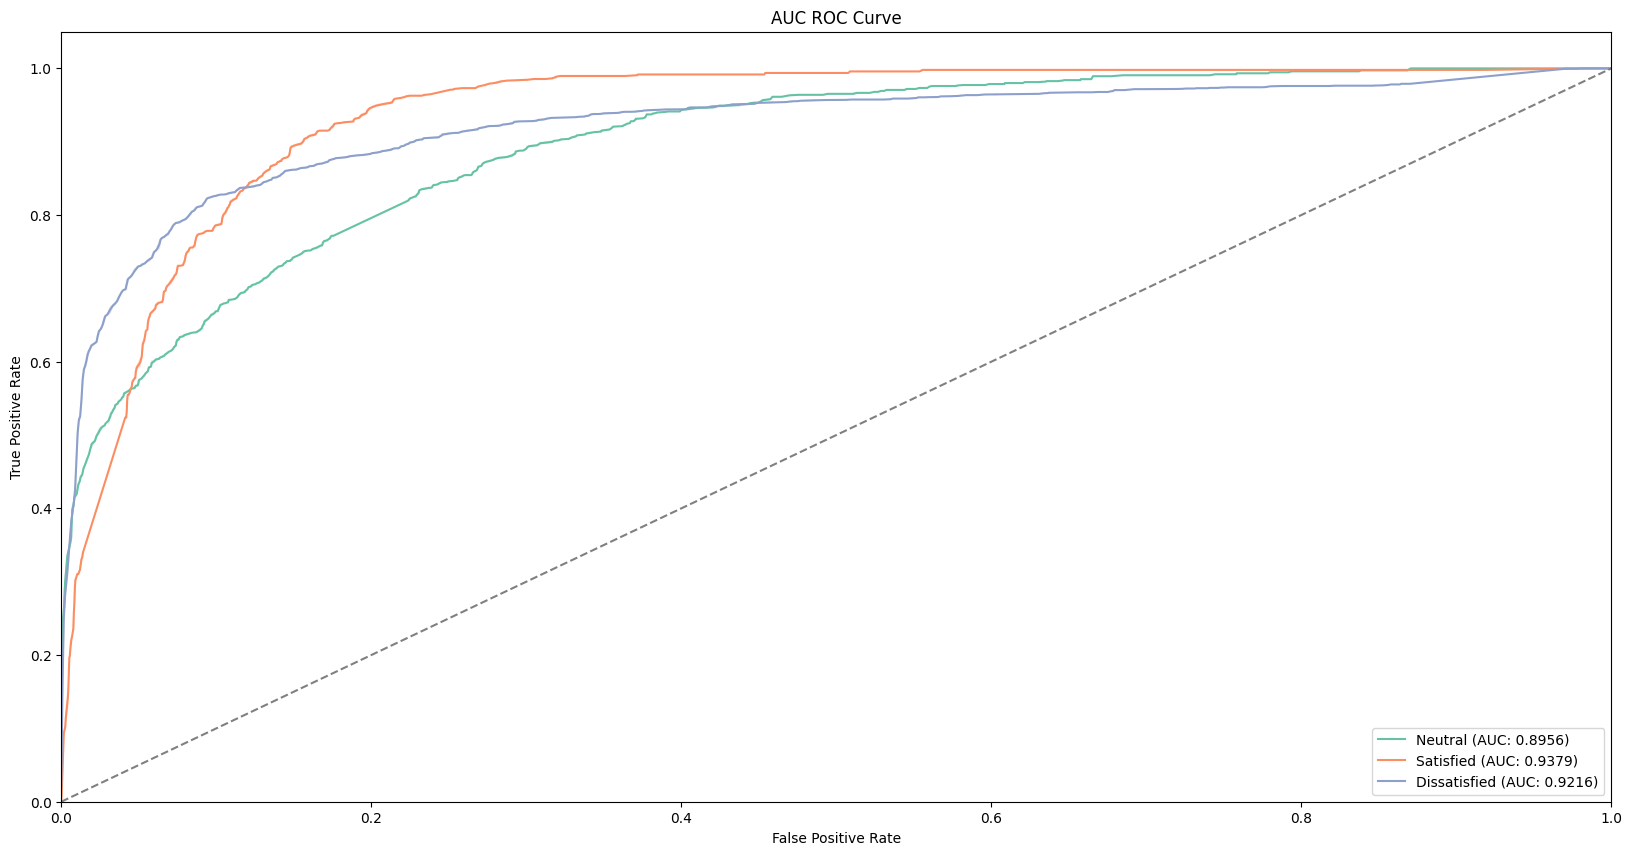

In [70]:
y_pred = model_V.predict_proba(x_test)

# Define class labels
class_labels = ['Neutral', 'Satisfied','Dissatisfied',]

# Binarize the true labels for multi-class (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Initialize ROC curve and AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class and calculate the ROC curve and AUC score
for i, class_label in enumerate(class_labels):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])  
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a new figure using Seaborn
plt.figure(figsize=(20, 10)) 

# Set Seaborn color palette"
sns.set_palette("Set2")

# Plot ROC curve for each class
for i, class_label in enumerate(class_labels):
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{class_label} (AUC: {roc_auc[i]:.4f})')

# Plot the random guessing line (optional)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')
plt.legend(loc="lower right")

# Show AUC values for each class
for i, class_label in enumerate(class_labels):
    print()
    print('-'*150)
    print(f"{class_label} AUC: {roc_auc[i]:.4f}")
# Display the plot
print()
print('-'*150)
plt.show()

Overall area under ROC Curve

- All three classes (Satisfied, Dissatisfied, and Neutral reviews) have high AUC values (0.8956, 0.9379, and 0.9216, respectively). This indicates that the model is generally performing well in distinguishing between the different sentiment classes.

Specific class analysis:

- Satisfied class: It has the highest AUC (0.9379). This suggests that the model is particularly good at distinguishing between satisfied class and other class. That can notice from steepest curve in the graph
- Disatisfied and Neutral class : The Disatisfied and Neutral classes also show high AUC values, indicating good performance in identifying negative and positive class. That can notice from steep curve in the graph, but less steep than Satisfied class

## Model Inference and Validation on Unseen Text

A crucial part of a predictive model's validation is testing its performance on new, unseen data, simulating a real-world application. This process, known as inference, involves passing a new input through the trained model pipeline to generate a prediction. The function designed for this task first converts the raw text into a numerical format consistent with the data used during training. This involves two key steps:

- **Text Vectorization:** The new text is transformed into a Term Frequency-Inverse Document Frequency (TF-IDF) vector. The TF-IDF approach, a cornerstone of information retrieval, assigns a numerical weight to each word that reflects its importance in a document relative to the entire corpus. This is achieved using the same pre-fitted tfidf_vectorizer instance that was used on the training data.
- **Dimensionality Reduction:** The resulting TF-IDF vector is then passed through the Principal Component Analysis (PCA) model, which was also pre-fitted during the feature engineering phase. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This step ensures that the new input is in the same reduced-feature space that the trained model expects.

Once the input text is appropriately transformed, the trained model (model_V) performs a prediction. Finally, the numerical output is converted back into its original sentiment label using the inverse transformation from the label encoder.

In [112]:
def predict(input_text):
    # Transform the input text into TF-IDF features using the fitted vectorizer
    input_data = tfidf_vectorizer.transform([input_text])

    # Convert the sparse matrix to a dense array
    input_data = input_data.toarray()

    # Apply PCA transformation
    input_data = pca.transform(input_data)

    # Make predictions using the transformed input data
    prediction_encoded = model_V.predict(input_data)[0]

    # Inverse transform to convert the prediction back to the original label
    prediction_original = le.inverse_transform([prediction_encoded])[0]

    return prediction_original

The following examples demonstrate the model's ability to correctly classify new reviews:

- Input: "I face really good experience in this app" -> Predicted Sentiment: Positive
- Input: "No idea about this app" -> Predicted Sentiment: Neutral
- Input: "This game is a waste of money" -> Predicted Sentiment: Negative
- Input: "This game is so boring" -> Predicted Sentiment: Negative

These examples confirm that the model's performance on the test set translates to accurate, real-world predictions.

In [117]:
input_text = "I face really good experience in this app"

print("Predicted sentiment:", predict(input_text))

Predicted sentiment: Positive


In [119]:
input_text = "No idea about this app"

print("Predicted sentiment:", predict(input_text))

Predicted sentiment: Neutral


In [114]:
input_text = "This game is waste a lot of money"

print("Predicted sentiment:", predict(input_text))

Predicted sentiment: Negative


In [118]:
input_text = "This game is so boring"

print("Predicted sentiment:", predict(input_text))

Predicted sentiment: Negative


# Conclusion

This project has successfully developed and evaluated a robust text classification model for sentiment analysis. The workflow followed a systematic machine learning pipeline, beginning with data collection and Exploratory Data Analysis (EDA). The EDA phase provided crucial insights into the dataset's characteristics, including word frequency, class distribution, and language heterogeneity. This understanding directly informed the subsequent data preprocessing steps, which involved cleaning the text by removing punctuation and emojis, tokenizing words, and applying lemmatization to prepare the data for modeling.

The feature engineering stage was pivotal, with the implementation of TF-IDF vectorization for text representation and Principal Component Analysis (PCA) for dimensionality reduction. These steps transformed the raw text into a structured, numerical format suitable for a machine learning model. To mitigate the issue of class imbalance identified during EDA, an oversampling technique was employed.

The modeling phase involved the selection and optimization of a machine learning classifier. After a comparative analysis of various models, the Random Forest Classifier was chosen due to its high performance. The model was further optimized using Bayesian optimization with the Optuna library to fine-tune its hyperparameters, resulting in a model with peak performance.

**The result**:
- Model for text classification is Random forest classifier
- Accuracy of the model is 81 percent on test dataset
- Precision is 81.40 percent, recall is 80.72 percent, and F1 Score is 80.93 percent.
- The model has stronght point in prediction positive reviews, and the model tend to have weak point in predicting neutral and dissatisfied reviews. However, the overall performance is still high according to accuracy, precision, recall, F1 score, and area under ROC curve.

# Discussion and Key Learning Outcomes

Building this text classification model provided several key learning outcomes:

- **Text-Specific Data Exploration:** The project highlighted that EDA for text data is distinct from that for tabular data. It requires a different set of visualization techniques, such as word clouds, to understand the vocabulary, distribution, and overall nature of the textual data.

- **Complexities of Text Preprocessing:** The project demonstrated that text preprocessing is a challenging process that requires careful consideration. The choice of cleaning methods, tokenization, and normalization techniques can significantly impact model performance.

- **Importance of Feature Engineering:** The project reaffirmed the importance of effective feature engineering. Selecting an appropriate text representation method, such as TF-IDF, and applying dimensionality reduction techniques are crucial steps for enabling a model to learn from textual data effectively.

- **Strategic Model Selection:** The project underscored the importance of selecting the right model for the task. The initial model selection and hyperparameter tuning were critical for achieving a high-performing classifier. The findings also confirmed that, for this task, the traditional Random Forest model, when properly tuned, performed comparably to more complex ensemble methods.

In summary, the project successfully delivered a high-performing sentiment classification model and provided a comprehensive understanding of the entire machine learning pipeline for text-based tasks. The model’s strengths in classifying positive reviews and its weaknesses with neutral and dissatisfied ones are well-documented, laying a clear path for future optimizations.